In [2]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
crash_data = pd.read_csv('eda_capstone.csv')

C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\1569665373.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_data = pd.read_csv('eda_capstone.csv')


In [4]:
crash_data.shape

(389963, 45)

In [5]:
crash_data.describe()

,road_user_type,no_of_vehicles,no_persons,no_persons_killed,road_geometry,severity,speed_zone,distance_location,lat,long,postcode_no,vehicle_year_manuf,total_no_occupants,severity_level,year_of_vehicle
count,389963.000000,389963.000000,389963.000000,389963.000000,389963.000000,389963.000000,389963.000000,389963.000000,389963.000000,389963.000000,389963.000000,367117.000000,389963.000000,389963.000000,367117.000000
mean,2.427694,2.089839,2.779920,0.017335,3.157961,2.652234,114.648300,102.130564,-37.741671,144.977607,3280.948490,1922.710983,1.326159,1.708434,90.272869
std,1.100175,0.906761,1.721895,0.147628,1.787795,0.508187,203.724088,339.845314,0.526264,0.723723,292.968605,393.702543,0.881737,0.735725,394.399720
min,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,30.000000,-1.000000,-39.032320,140.966178,3000.000000,0.000000,0.000000,1.000000,-986.000000
25%,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,60.000000,0.000000,-37.944560,144.891923,3068.000000,1998.000000,1.000000,1.000000,4.000000
50%,2.000000,2.000000,2.000000,0.000000,2.000000,3.000000,60.000000,0.000000,-37.821540,145.017680,3166.000000,2004.000000,1.000000,2.000000,9.000000
75%,2.000000,2.000000,3.000000,0.000000,5.000000,3.000000,80.000000,62.000000,-37.732625,145.178126,3380.000000,2009.000000,1.000000,2.000000,15.000000
max,7.000000,21.000000,97.000000,11.000000,9.000000,4.000000,999.000000,63038.000000,-34.062380,149.756785,3996.000000,3001.000000,96.000000,3.000000,2020.000000


<Axes: >

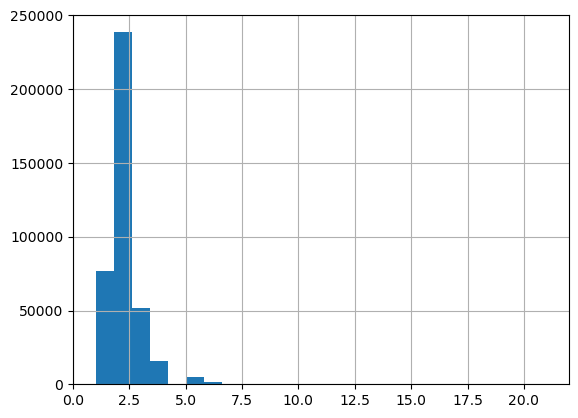

In [6]:
crash_data.no_of_vehicles.hist(bins=25)

<Axes: >

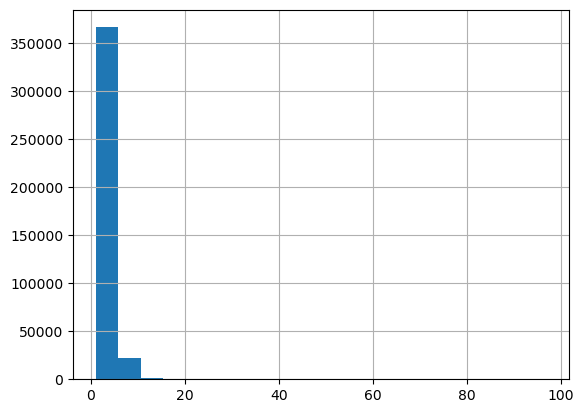

In [7]:
crash_data.no_persons.hist(bins=20)

<Axes: >

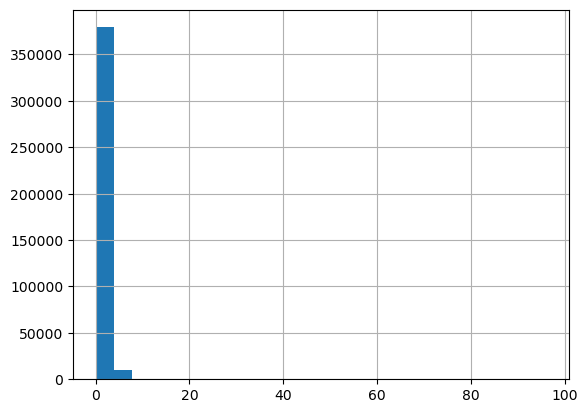

In [8]:
crash_data.total_no_occupants.hist(bins=25)

<Axes: >

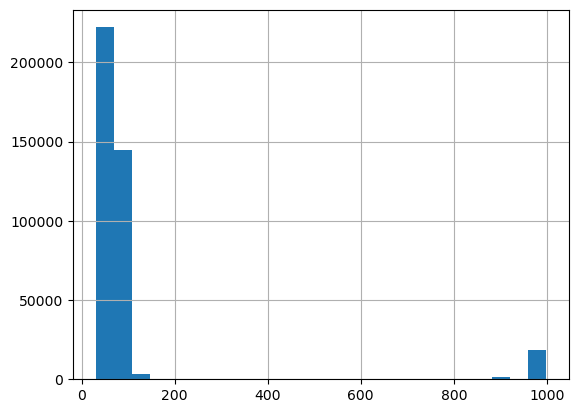

In [9]:
crash_data.speed_zone.hist(bins=25)

<Axes: >

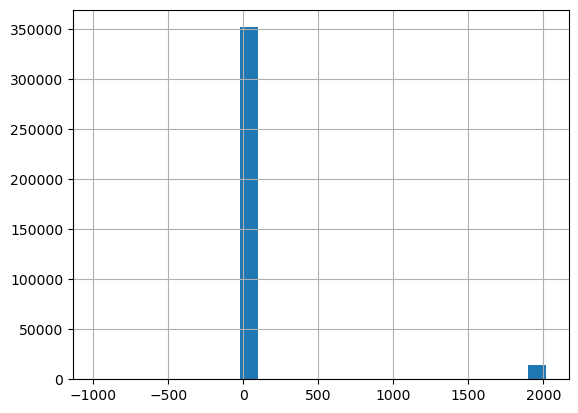

In [10]:
crash_data.year_of_vehicle.hist(bins=25)

C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\1499795089.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = crash_data.corr()


<Axes: >

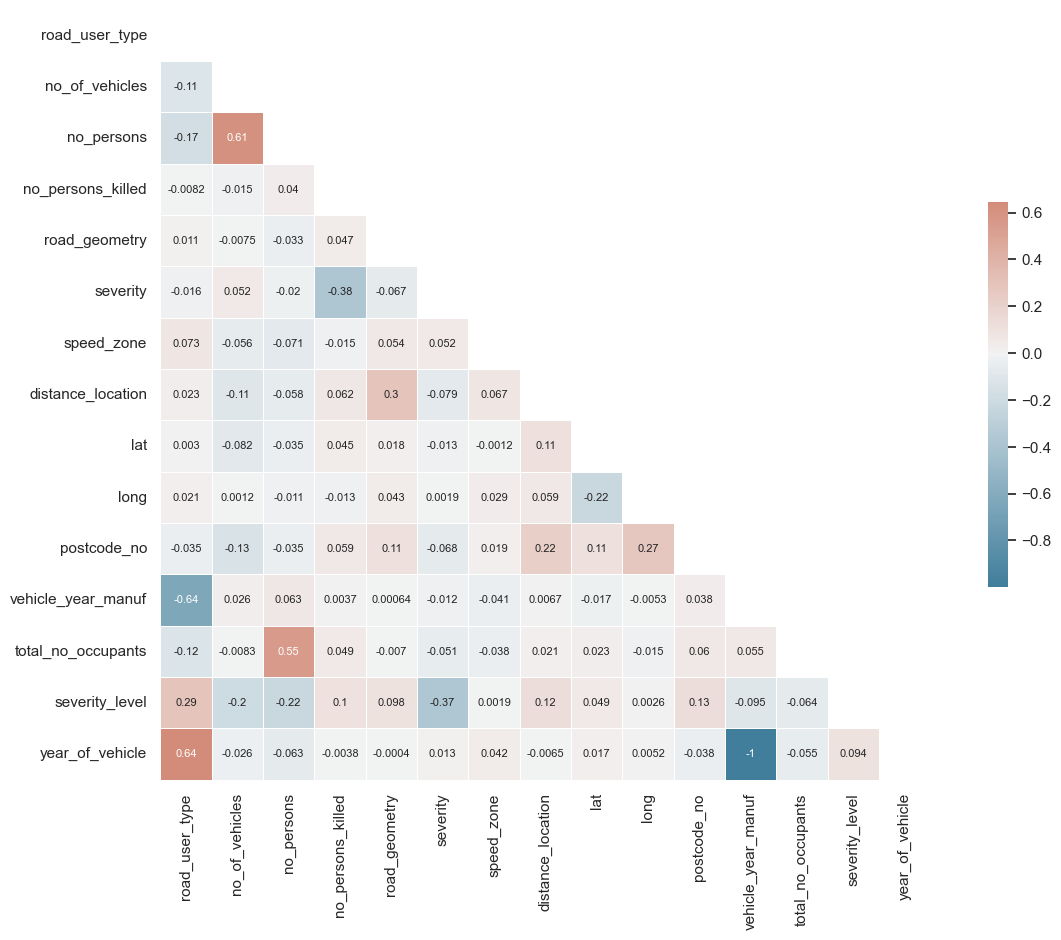

In [11]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = crash_data.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

In [12]:
# Handle outliers 
crash_data.total_no_occupants.describe()

count    389963.000000
mean          1.326159
std           0.881737
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          96.000000
Name: total_no_occupants, dtype: float64

In [13]:
crash_data[crash_data['total_no_occupants'] > 30]

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model
7943,T20060015893,B,M,30-39,Not injured,D,1,2,Drivers,2006-04-26,...,Bus/Coach,47.0,No control,1,26.0,Paved,V,BUS,UNKN,DENAIR
8224,T20060016634,B,M,40-49,Other injury,D,9,7,Drivers,2006-04-28,...,Train,40.0,RX No control,2,NaN,Paved,V,TRAIN,UNKN,
23384,T20060045093,A,M,50-59,Not injured,D,1,2,Drivers,2006-02-12,...,Bus/Coach,35.0,No control,1,16.0,Paved,V,BUS,DENING,D DECK
23385,T20060045093,A,M,50-59,Not injured,D,1,2,Drivers,2006-02-12,...,Bus/Coach,35.0,No control,1,16.0,Paved,V,BUS,DENING,D DECK
28652,T20070006026,B,M,30-39,Not injured,D,1,2,Drivers,2007-02-19,...,Bus/Coach,48.0,No control,1,10.0,Paved,V,BUS,MERC B,OHL141
36652,T20070020494,B,M,50-59,Other injury,D,9,7,Drivers,2007-05-06,...,Train,37.0,Flashing lights,2,2007.0,Unknown,V,TRAIN,UNKN,
42013,T20070030579,B,M,50-59,Not injured,D,9,7,Drivers,2007-08-22,...,Train,40.0,RX Bells/Lights,1,NaN,Unpaved,,TRAIN,UNKN,
63989,T20080022701,B,M,50-59,Not injured,D,2,7,Drivers,2008-06-21,...,Train,66.0,RX Gates/Booms,1,NaN,Unknown,V,TRAIN,UNKN,
63990,T20080022701,B,M,50-59,Not injured,D,2,7,Drivers,2008-06-21,...,Train,66.0,RX Gates/Booms,1,NaN,Unknown,V,TRAIN,UNKN,
64821,T20080024078,A,M,60-64,Not injured,D,9,2,Drivers,2008-02-07,...,Bus/Coach,44.0,No control,1,10.0,Paved,V,BUS,MERC B,OH1418


In [14]:
crash_data['vehicle_type_desc_x'].value_counts()

Car                                                   207931
Station Wagon                                          62738
Motor Cycle                                            30399
Utility                                                29684
Bicycle                                                23667
Panel Van                                               8716
Taxi                                                    5069
Heavy Vehicle (Rigid) > 4.5 Tonnes                      5068
Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM      4305
Prime Mover - Single Trailer                            2836
Bus/Coach                                               2039
Motor Scooter                                           2001
Tram                                                    1078
Prime Mover B-Double                                    1029
Other Vehicle                                            818
Prime Mover (No of Trailers Unknown)                     704
Prime Mover Only        

In [15]:
crash_data = crash_data[crash_data['total_no_occupants'] <= 40]

In [16]:
pd.set_option('display.max_columns', None)

injury_vehicle_counts = crash_data.groupby(['inj_level_desc', 'vehicle_type_desc_x']).size().unstack(fill_value=0)
injury_vehicle_counts

vehicle_type_desc_x,Bicycle,Bus/Coach,Car,Heavy Vehicle (Rigid) > 4.5 Tonnes,Horse (ridden or drawn),Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM,Mini Bus(9-13 seats),Moped,Motor Cycle,Motor Scooter,Other Vehicle,Panel Van,Plant machinery and Agricultural equipment,Prime Mover (No of Trailers Unknown),Prime Mover - Single Trailer,Prime Mover B-Double,Prime Mover B-Triple,Prime Mover Only,Quad Bike,Rigid Truck(Weight Unknown),Station Wagon,Taxi,Train,Tram,Utility
inj_level_desc,,,,,,,,,,,,,,,,,,,,,,,,,
Fatality,142,1,1308,38,4,14,2,4,624,9,14,48,3,19,33,10,1,2,6,3,296,7,0,0,263
Not injured,455,1766,100531,3858,5,3031,233,7,968,50,474,5453,97,469,2058,702,38,516,18,147,35575,4138,78,1036,17252
Other injury,16796,202,76297,858,9,958,82,158,16153,1318,232,2251,51,144,494,195,9,81,41,30,20205,758,5,33,8368
Serious injury,6274,61,29795,314,11,302,36,80,12654,624,98,964,22,72,251,122,5,45,39,9,6662,166,0,8,3801


In [17]:
# Create a new column with the condensed vehicle types
crash_data['condensed_vehicle_type'] = crash_data['vehicle_type_desc_x'].replace({
    'Bicycle': 'Cyclist',
    'Bus/Coach': 'Bus/Coach',
    'Car': 'Car',
    'Heavy Vehicle (Rigid) > 4.5 Tonnes': 'Heavy Vehicle',
    'Horse (ridden or drawn)': 'Other',
    'Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM': 'Light Commercial Vehicle',
    'Mini Bus(9-13 seats)': 'Bus/Coach',
    'Moped': 'Motorcycle',
    'Motor Cycle': 'Motorcycle',
    'Motor Scooter': 'Motorcycle',
    'Other Vehicle': 'Other',
    'Panel Van': 'Light Commercial Vehicle',
    'Plant machinery and Agricultural equipment': 'Other',
    'Prime Mover (No of Trailers Unknown)': 'Prime Mover',
    'Prime Mover - Single Trailer': 'Prime Mover',
    'Prime Mover B-Double': 'Prime Mover',
    'Prime Mover B-Triple': 'Prime Mover',
    'Prime Mover Only': 'Prime Mover',
    'Quad Bike': 'Other',
    'Rigid Truck(Weight Unknown)': 'Heavy Vehicle',
    'Station Wagon': 'Car',
    'Taxi': 'Car',
    'Train': 'Train',
    'Tram': 'Tram',
    'Utility': 'Car'
})

In [18]:
crash_data

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_of_vehicles,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type
0,T20060000010,A,M,70+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car
1,T20060000010,B,F,60-64,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389958,T20200019195,B,M,22-25,Serious injury,D,6,4,Motorcyclists,2020-10-31,15:16:00,Collision with vehicle,Saturday,RIGHT THROUGH,Day,2,2,0,2,T intersection,2,40,Dry,VICTORIA,STREET,0.0,YARRA,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.810825,145.003211,3121.0,Clear,2016.0,Paved,Motor Cycle,1.0,No control,3,4.0,Paved,V,SOLO,YAMAHA,MTM850,Motorcycle
389959,T20200019239,A,M,30-39,Not injured,D,9,2,Drivers,2020-01-11,12:11:00,Collision with vehicle,Sunday,LEAVING PARKING,Day,2,4,0,5,Not at intersection,2,50,Dry,ALEXANDRA,AVENUE,147.0,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.828081,144.983214,3004.0,Clear,2019.0,Paved,Station Wagon,3.0,No control,1,1.0,Paved,V,WAGON,B M W,X6 30D,Car
389960,T20200019239,B,M,26-29,Serious injury,D,6,6,Bicyclists,2020-01-11,12:11:00,Collision with vehicle,Sunday,LEAVING PARKING,Day,2,4,0,5,Not at intersection,2,50,Dry,ALEXANDRA,AVENUE,147.0,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.828081,144.983214,3004.0,Clear,0.0,Paved,Bicycle,1.0,No control,3,2020.0,Paved,,,,,Cyclist
389961,T20200019247,A,M,17-21,Serious injury,D,1,2,Drivers,2020-01-11,15:30:00,Collision with a fixed object,Sunday,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,Day,1,2,0,5,Not at intersection,2,999,Dry,MATTHEWS,ROAD,413.0,GEELONG,SOUTH WESTERN REGION,TOWNS,-38.213352,144.443982,3224.0,Clear,2006.0,Gravel,Car,2.0,No control,3,14.0,

In [19]:
injury_vehicle_counts = crash_data.groupby(['inj_level_desc', 'condensed_vehicle_type']).size().unstack(fill_value=0)
injury_vehicle_counts

condensed_vehicle_type,Bus/Coach,Car,Cyclist,Heavy Vehicle,Light Commercial Vehicle,Motorcycle,Other,Prime Mover,Train,Tram
inj_level_desc,,,,,,,,,,
Fatality,3,1874,142,41,62,637,27,65,0,0
Not injured,1999,157496,455,4005,8484,1025,594,3783,78,1036
Other injury,284,105628,16796,888,3209,17629,333,923,5,33
Serious injury,97,40424,6274,323,1266,13358,170,495,0,8


In [20]:
crash_data.groupby(['inj_level_desc', 'total_no_occupants']).size().unstack(fill_value=0)


total_no_occupants,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,37.0,40.0
inj_level_desc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fatality,0,2338,393,61,30,22,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Not injured,17,134660,29855,8420,3932,1517,262,98,54,30,17,14,18,13,5,2,4,4,3,0,11,1,1,1,0,2,3,1,0,2,2,1,1,0,2,1,1
Other injury,5,117974,19195,5216,2268,822,145,33,21,12,8,1,4,3,1,3,0,1,2,1,2,2,0,0,1,1,2,0,0,1,1,0,0,1,0,1,1
Serious injury,2,52006,7371,1804,809,303,62,28,9,4,0,1,4,2,0,3,0,0,0,3,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [21]:

# Define the bin edges and labels
bins = [0, 1, 2, 3, 4, float('inf')]
labels = ['1', '2', '3', '4', '5+']

# Create a new column with the condensed total occupants
crash_data['condensed_total_occupants'] = pd.cut(crash_data['total_no_occupants'], bins=bins, labels=labels)

# Perform the groupby operation
injury_occupants_counts = crash_data.groupby(['inj_level_desc', 'condensed_total_occupants']).size().unstack(fill_value=0)

# Reset the display options to show all columns
pd.reset_option('display.max_columns')

# Print the resulting DataFrame
print(injury_occupants_counts)

condensed_total_occupants       1      2     3     4    5+
inj_level_desc                                            
Fatality                     2338    393    61    30    29
Not injured                134660  29855  8420  3932  2071
Other injury               117974  19195  5216  2268  1070
Serious injury              52006   7371  1804   809   423


In [22]:
# Define the bin edges and labels
bins = [0, 1, 2, 3, 4, float('inf')]
labels = ['1', '2', '3', '4', '5+']

# Create a new column with the condensed total occupants
crash_data['condensed_total_occupants'] = pd.cut(crash_data['total_no_occupants'], bins=bins, labels=labels)

# Perform the groupby operation and calculate the counts
injury_occupants_counts = crash_data.groupby(['inj_level_desc', 'condensed_total_occupants']).size().unstack(fill_value=0)

# Calculate the percentages
injury_occupants_percentages = injury_occupants_counts.div(injury_occupants_counts.sum(axis=1), axis=0) * 100

# Reset the display options to show all columns
pd.reset_option('display.max_columns')

# Print the resulting DataFrame
injury_occupants_percentages

condensed_total_occupants,1,2,3,4,5+
inj_level_desc,,,,,
Fatality,82.006314,13.784637,2.139600,1.052262,1.017187
Not injured,75.255116,16.684550,4.705540,2.197409,1.157384
Other injury,80.957707,13.172251,3.579394,1.556378,0.734270
Serious injury,83.325589,11.810040,2.890423,1.296204,0.677743


In [23]:
crash_data.groupby(['inj_level_desc', 'no_of_vehicles']).size().unstack(fill_value=0)

no_of_vehicles,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,19,21
inj_level_desc,,,,,,,,,,,,,,,,,
Fatality,1341,1214,230,41,15,4,2,0,0,3,1,0,0,0,0,0,0
Not injured,21858,110821,30688,10321,3446,949,343,166,81,69,18,119,22,6,28,0,20
Other injury,31172,93499,15477,3986,1101,290,92,46,27,9,12,12,2,0,2,0,1
Serious injury,22184,33027,5269,1285,425,130,51,16,7,15,1,1,0,0,2,2,0


In [24]:
# Create a mapping dictionary for condensing the categories
condensed_categories = {
    1: 1,
    2: 2,
    3: "3+",
    4: "3+",
    5: "3+",
    6: "3+",
    7: "3+",
    8: "3+",
    9: "3+",
    10: "3+",
    11: "3+",
    12: "3+",
    13: "3+",
    14: "3+",
    16: "3+",
    19: "3+",
    21: "3+"
}

# Map the categories to the condensed categories using the mapping dictionary
crash_data['condensed_no_of_vehicles'] = crash_data['no_of_vehicles'].map(condensed_categories)

# Drop the original 'no_of_vehicles' column if desired
crash_data.drop('no_of_vehicles', axis=1, inplace=True)

# Perform further preprocessing, such as one-hot encoding or ordinal encoding, on the condensed variable as needed

# Display the updated DataFrame
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles
0,T20060000010,A,M,70+,Not injured,D,1,2,Drivers,2006-01-13,...,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+
1,T20060000010,B,F,60-64,Other injury,D,1,2,Drivers,2006-01-13,...,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,...,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,...,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,...,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2


In [25]:
crash_data.groupby(['inj_level_desc', 'condensed_no_of_vehicles']).size().unstack(fill_value=0)

condensed_no_of_vehicles,1,2,3+
inj_level_desc,,,
Fatality,1341,1214,296
Not injured,21858,110821,46276
Other injury,31172,93499,21057
Serious injury,22184,33027,7204


In [26]:
crash_data.groupby(['inj_level_desc', 'year_of_vehicle']).size().unstack(fill_value=0)

year_of_vehicle,-986.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
inj_level_desc,,,,,,,,,,,,,,,,,,,,,
Fatality,0,0,46,99,122,109,110,105,121,116,...,1,3,3,12,18,22,25,14,21,21
Not injured,1,4,4398,11469,11527,11247,10545,10751,9885,9586,...,78,43,34,156,512,555,384,428,472,188
Other injury,0,3,3105,8259,7914,7697,7304,6909,6955,6908,...,130,107,107,430,1445,1316,1234,1286,1449,636
Serious injury,0,0,1335,3282,3069,2886,2823,2796,2732,2705,...,62,55,56,257,644,583,547,403,312,251


In [27]:
pd.set_option('display.max_columns', None)

crash_data[crash_data['year_of_vehicle'] >= 90]

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles
60,T20060000213,B,M,17-21,Other injury,D,6,6,Bicyclists,2006-01-19,20:23:00,Collision with vehicle,Thursday,RIGHT FAR (INTERSECTIONS ONLY),Day,2,0,2,T intersection,3,50,Dry,PRINCES,HIGHWAY,33.0,EAST GIPPSLAND,EASTERN REGION,TOWNS,-37.864718,148.022158,3909.0,Clear,0.0,Paved,Bicycle,1.0,Ped. crossing,2,2006.0,Paved,,,,,Cyclist,1,2
1107,T20060002672,B,M,30-39,Other injury,D,9,4,Motorcyclists,2006-01-19,10:30:00,Collision with vehicle,Thursday,VEHICLE STRIKES ANOTHER VEH WHILE EMERGING FRO...,Day,2,0,2,T intersection,3,999,Dry,LANDCOX,STREET,84.0,BAYSIDE,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.906390,145.014528,3187.0,Clear,4.0,Paved,Motor Cycle,1.0,No control,2,2002.0,Paved,,,,,Motorcycle,1,2
1210,T20060002843,B,M,40-49,Serious injury,D,6,6,Bicyclists,2006-02-18,09:00:00,Fall from or in moving vehicle,Saturday,PULLING OUT (OVERTAKING),Day,2,0,1,Cross intersection,2,60,Dry,ALEXANDRA,STREET,0.0,GLEN EIRA,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.866785,145.002703,3183.0,Clear,0.0,Paved,Bicycle,1.0,No control,3,2006.0,Paved,,,,,Cyclist,1,2
1445,T20060003212,A,M,40-49,Serious injury,D,9,4,Motorcyclists,2006-02-21,12:15:00,No collision and no object struck,Tuesday,OUT OF CONTROL ON CARRIAGEWAY (ON BEND) ...,Day,1,0,5,Not at intersection,2,100,Dry,MANSFIELD-WHITFIELD,ROAD,545.0,WANGARATTA,NORTH EASTERN REGION,RURAL_VICTORIA,-36.796331,146.356981,3678.0,Clear,1905.0,Paved,Motor Cycle,1.0,No control,3,101.0,Paved,N,CYCLE,YAMAHA,YZR R1,Motorcycle,1,1
2929,T20060006121,B,F,22-25,Serious injury,D,6,6,Bicyclists,2006-10-03,09:00:00,Collision with vehicle,Friday,LEFT NEAR (INTERSECTIONS ONLY),Day,3,0,4,Multiple intersection,2,60,Dry,MAIN HURSTBRIDGE,ROAD,0.0,NILLUMBIK,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.674247,145.157049,3089.0,Clear,0.0,Paved,Bicycle,1.0,No control,3,2006.0,Paved,,,,,Cyclist,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389927,T20200018583,A,M,13-15,Other injury,D,7,6,Bicyclists,2020-10-21,15:42:00,Struck Pedestrian,Wednesday,VEH STRIKES PED ON FOOTPATH/MEDIAN/TRAFFIC ISL...,Day,2,0,5,Not at intersection,2,50,Dry,ROWAN,STREET,22.0,MANNINGHAM,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.780504,145.150842,3109.0,Clear,0.0,Paved,Bicycle,1.0,RX Bells/Lights,2,2020.0,Paved,,,,,Cyclist,1,1
389928,T20200018596,B,M,60-64,Serious injury,D,6,6,Bicyclists,2020-10-22,13:40:00,Collision with vehicle,Thursday,LANE SIDE SWIPE (VEHICLES IN PARALLEL LANES) ...,Day,2,0,5,Not at intersection,2,50,Dry,PICKINGS,ROAD,14.0,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-38.319062,145.000243,3936.0,Clear,0.0,Paved,Bicycle,1.0,No control,3,2020.0,Paved,,,,,Cyclist,1,2
389929,T20200018606,A,M,5-Dec,Serious injury,D,9,6,Bicyclists,2020-10-22,15:15:00,Collision with vehicle,Thursday,VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY,Day,3,0,4,Multiple intersection,2,60,Dry,OUTER,CRESCENT,10.0,BAYSIDE,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.906395,144.995039,3186.0,Clear,0.0,Paved,Bicycle,1.0,Roundabout,3,2020.0,Paved,,,,,Cyclist,1,3+
389939,T20200018733,B,F,17-21,Serious injury,D,6,6,Bicyclists,2020-10-20,12:35:00,Collision with vehicle,Tuesday,VEHI

In [28]:

crash_data.loc[crash_data['year_of_vehicle'] > 101, 'year_of_vehicle'] = 0
crash_data.loc[crash_data['year_of_vehicle'] < 0, 'year_of_vehicle'] = 0
# Display the updated summary statistics
crash_data['year_of_vehicle'].describe()

count    367106.000000
mean          9.110516
std           6.897935
min           0.000000
25%           4.000000
50%           8.000000
75%          14.000000
max         101.000000
Name: year_of_vehicle, dtype: float64

In [29]:
# Handling outliers in 'year_of_vehicle' column
Q1 = crash_data['year_of_vehicle'].quantile(0.25)
Q3 = crash_data['year_of_vehicle'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print(lower_threshold)
print(upper_threshold)

-11.0
29.0


In [30]:
crash_data['year_of_vehicle'].describe()

count    367106.000000
mean          9.110516
std           6.897935
min           0.000000
25%           4.000000
50%           8.000000
75%          14.000000
max         101.000000
Name: year_of_vehicle, dtype: float64

In [31]:
crash_data.groupby(['inj_level_desc', 'year_of_vehicle']).size().unstack(fill_value=0)

year_of_vehicle,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,88.0,89.0,90.0,91.0,93.0,96.0,99.0,101.0
inj_level_desc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fatality,190,99,122,109,110,105,121,116,122,125,124,118,144,153,119,94,122,94,91,71,65,66,36,37,30,27,20,18,6,6,9,5,6,7,3,1,1,2,2,1,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Not injured,7430,11469,11527,11247,10545,10751,9885,9586,9138,8804,8520,8160,7743,7177,6643,6004,5182,4507,3751,3104,2372,2008,1555,1187,847,680,501,407,329,233,177,139,110,83,71,87,52,59,56,30,32,25,19,8,18,22,13,11,7,8,13,3,5,5,2,6,2,2,4,3,0,3,2,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,2,1,2,1,0,0,1,1,0,0,1,1,0
Other injury,11517,8259,7914,7697,7304,6909,6955,6908,6627,6521,6405,6255,5974,5656,5298,4733,4271,3749,3069,2583,2078,1684,1400,1040,737,646,433,356,268,223,145,130,96,76,81,68,62,56,35,32,32,38,23,21,19,19,15,5,17,11,9,9,3,5,3,3,1,1,4,2,2,1,2,2,2,2,0,1,3,1,3,2,0,0,0,1,0,1,2,1,2,3,0,0,0,1,1,0,0,0,2,0,0,0,0
Serious injury,4689,3282,3069,2886,2823,2796,2732,2705,2657,2722,2701,2541,2573,2511,2317,2125,1993,1763,1695,1365,1158,892,752,574,429,324,267,218,153,124,93,73,68,47,47,39,31,33,19,26,17,19,18,15,8,8,8,10,5,7,8,11,2,2,2,2,2,0,0,1,1,3,0,1,1,1,2,1,0,0,0,1,3,1,1,1,2,2,2,1,0,0,0,0,2,0,2,1,0,0,1,1,0,0,2


In [32]:
import scipy.stats as stats

# Convert "inj_level_desc" to a numeric variable
crash_data['inj_binary'] = crash_data['inj_level_desc'].map({'Not injured': 0, 'Other injury': 1, 'Serious injury': 2, 'Fatality': 3})

# Drop rows with missing or invalid values
data_cleaned = crash_data.dropna(subset=['inj_binary', 'year_of_vehicle'])

# Calculate the point-biserial correlation coefficient
correlation, p_value = stats.pointbiserialr(data_cleaned['inj_binary'], data_cleaned['year_of_vehicle'])

# Display the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: 0.04035725739871069
p-value: 3.746009473309409e-132


In [33]:
crash_data['severe_outcome'] = crash_data['inj_level_desc'].map({'Not injured': 0, 'Other injury': 0, 'Serious injury': 1, 'Fatality': 1})

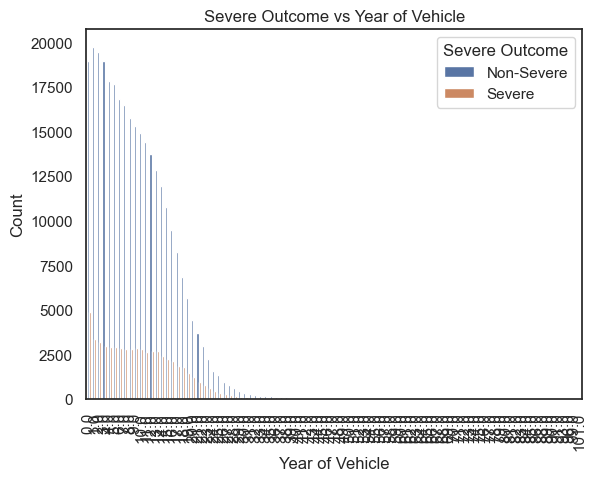

In [34]:
# Plotting the severe outcome against the year of the vehicle
sns.countplot(x='year_of_vehicle', hue='severe_outcome', data=crash_data)
plt.xlabel('Year of Vehicle')
plt.ylabel('Count')
plt.title('Severe Outcome vs Year of Vehicle')
plt.legend(title='Severe Outcome', labels=['Non-Severe', 'Severe'])
plt.xticks(rotation=90)
plt.show()

In [35]:
pd.set_option('display.max_rows', None)  # Set the option to display all rows
year_counts = crash_data['year_of_vehicle'].value_counts(normalize=True) * 100
print(year_counts)

0.0      6.490224
1.0      6.294912
2.0      6.164977
3.0      5.976203
4.0      5.661035
5.0      5.600835
6.0      5.364391
7.0      5.261423
8.0      5.051402
9.0      4.950069
10.0     4.835116
11.0     4.650973
12.0     4.476636
13.0     4.221397
14.0     3.916308
15.0     3.529226
16.0     3.151133
17.0     2.754790
18.0     2.344282
19.0     1.940312
20.0     1.545330
21.0     1.266664
22.0     1.019597
23.0     0.773074
24.0     0.556515
25.0     0.456816
26.0     0.332601
27.0     0.272128
28.0     0.205935
29.0     0.159627
30.0     0.115498
31.0     0.094523
32.0     0.076272
33.0     0.058021
34.0     0.055025
35.0     0.053118
37.0     0.040860
36.0     0.039771
38.0     0.030509
39.0     0.024244
41.0     0.022337
40.0     0.022064
42.0     0.016344
45.0     0.013620
44.0     0.012258
43.0     0.011986
46.0     0.009806
48.0     0.008444
50.0     0.008172
49.0     0.007082
47.0     0.007082
51.0     0.006265
53.0     0.003269
55.0     0.002996
52.0     0.002724
58.0     0

In [36]:
# Define the bins for condensing the years
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, float('inf')]

# Create labels for the condensed categories
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

# Use the 'cut' function to bin the values and assign labels
condensed_years = pd.cut(crash_data['year_of_vehicle'], bins=bins, labels=labels)

# Calculate the condensed value counts as a percentage
condensed_counts = condensed_years.value_counts(normalize=True) * 100

print(condensed_counts)

20    7.875495
1     6.731822
2     6.592869
3     6.390993
4     6.053950
5     5.989571
6     5.736716
7     5.626602
8     5.402004
9     5.293638
10    5.170706
11    4.973782
12    4.787346
13    4.514391
14    4.188126
15    3.774179
16    3.369844
17    2.945992
18    2.506991
19    2.074983
Name: year_of_vehicle, dtype: float64


In [37]:
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome
0,T20060000010,A,M,70+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+,0,0
1,T20060000010,B,F,60-64,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+,1,0
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+,0,0
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2,0,0
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2,1,0


In [38]:
crash_data['condensed_years'] = condensed_years

In [39]:
crash_data['seating_position'].value_counts()

D     387549
NK      1766
LF       589
CF        25
          16
D          3
PS         1
Name: seating_position, dtype: int64

In [40]:
crash_data['seating_position'] = crash_data['seating_position'].str.strip()  # Remove leading/trailing whitespace
filtered_data = crash_data[crash_data['seating_position'] == 'D']
filtered_counts = filtered_data['seating_position'].value_counts()
filtered_counts

D    387552
Name: seating_position, dtype: int64

In [41]:
crash_data = crash_data[crash_data['seating_position'] == 'D']
crash_data.shape

(387552, 50)

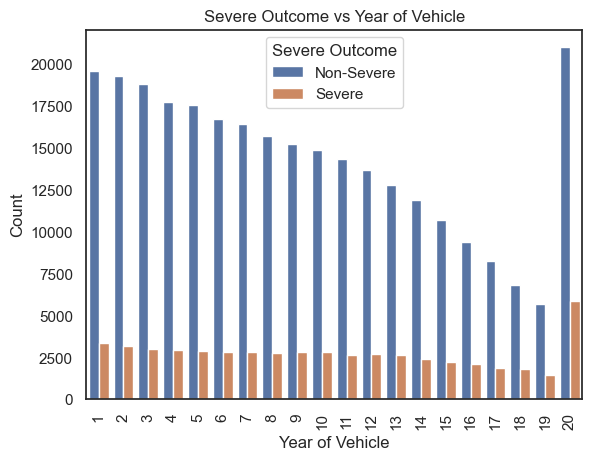

In [42]:
# Plotting the severe outcome against the year of the vehicle
sns.countplot(x='condensed_years', hue='severe_outcome', data=crash_data)
plt.xlabel('Year of Vehicle')
plt.ylabel('Count')
plt.title('Severe Outcome vs Year of Vehicle')
plt.legend(title='Severe Outcome', labels=['Non-Severe', 'Severe'])
plt.xticks(rotation=90)
plt.show()

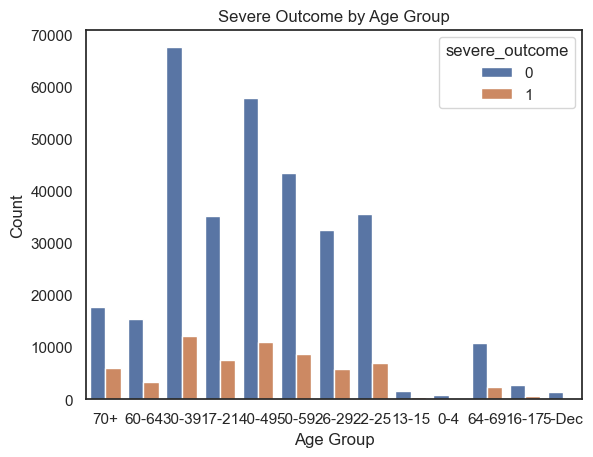

In [43]:
sns.countplot(x='age_group', hue='severe_outcome', data=crash_data)
plt.title('Severe Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [44]:
crash_data['age_group'].value_counts()/crash_data.shape[0]*100

30-39    20.559306
40-49    17.764842
50-59    13.462968
17-21    10.995686
22-25    10.976850
26-29     9.858032
70+       6.130274
60-64     4.811999
64-69     3.384578
16-17     0.861304
13-15     0.519414
5-Dec     0.446908
0-4       0.227840
Name: age_group, dtype: float64

In [45]:
# Define the mapping of original values to condensed categories
condensed_categories = {
    'Under 17': 'Under 17',
    '17-21': '17-21',
    '22-25': '22-25',
    '26-29': '26-29',
    '30-39': '30-39',
    '40-49': '40-49',
    '50-59': '50-59',
    '60-64': '60+',
    '64-69': '60+',
    '70+': '60+',
    '13-15': 'Under 17',
    '5-Dec': 'Under 17',
    '0-4': 'Under 17'
}

# Replace the values in the 'age_group' column with the condensed categories
crash_data['age_group'] = crash_data['age_group'].replace(condensed_categories)

# Calculate the condensed value counts as a percentage
condensed_counts = crash_data['age_group'].value_counts(normalize=True) * 100

print(condensed_counts)

30-39       20.559306
40-49       17.764842
60+         14.326852
50-59       13.462968
17-21       10.995686
22-25       10.976850
26-29        9.858032
Under 17     1.194162
16-17        0.861304
Name: age_group, dtype: float64


C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\1642029624.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['age_group'] = crash_data['age_group'].replace(condensed_categories)


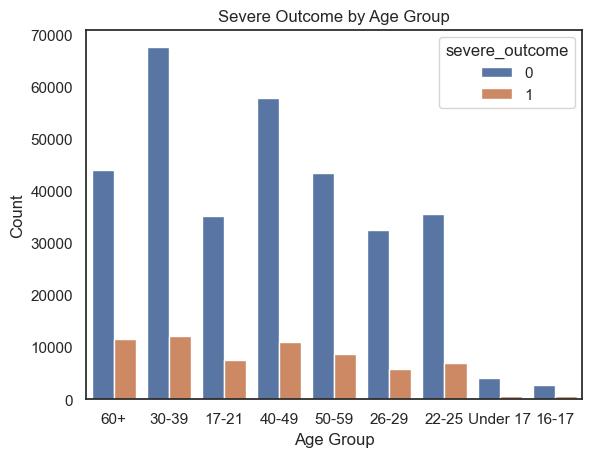

In [46]:
sns.countplot(x='age_group', hue='severe_outcome', data=crash_data)
plt.title('Severe Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

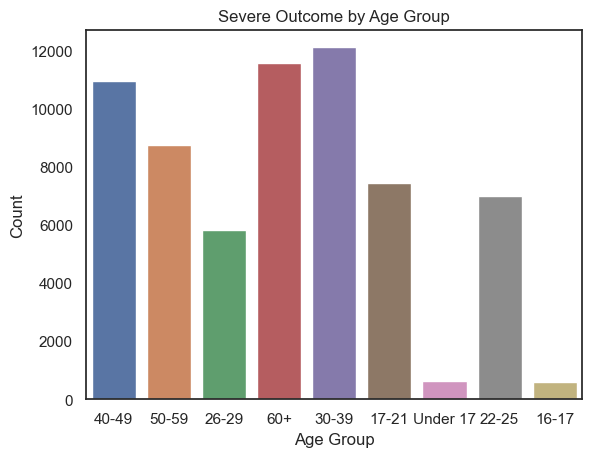

In [47]:
# Filter the data for severe outcomes (1)
severe_data = crash_data[crash_data['severe_outcome'] == 1]

# Plot the count of severe outcomes by age group
sns.countplot(x='age_group', data=severe_data)
plt.title('Severe Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [48]:
# Create weekend and weekday column
crash_data['weekday'] = pd.to_datetime(crash_data['accidentdate']).dt.dayofweek < 5
crash_data['weekend'] = ~crash_data['weekday']

# Create seasons column
crash_data['seasons'] = pd.to_datetime(crash_data['accidentdate']).dt.month % 12 // 3 + 1

# Create time of day column
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

crash_data['time_of_day'] = pd.to_datetime(crash_data['accidenttime']).dt.hour.apply(
    lambda x: timeofdaygroups[(x + 2) % 24 // 4 + 1] if not pd.isnull(x) else None
)

C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\4098607489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['weekday'] = pd.to_datetime(crash_data['accidentdate']).dt.dayofweek < 5
C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\4098607489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['weekend'] = ~crash_data['weekday']
C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\4098607489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [49]:
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome,condensed_years,weekday,weekend,seasons,time_of_day
0,T20060000010,A,M,60+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+,0,0,10,True,False,1,Afternoon (14-16)
1,T20060000010,B,F,60+,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+,1,0,3,True,False,1,Afternoon (14-16)
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+,0,0,5,True,False,1,Afternoon (14-16)
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2,0,0,8,True,False,1,Evening (18-22)
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2,1,0,15,True,False,1,Evening (18-22)


C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\597018688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['accidentdate'] = pd.to_datetime(crash_data['accidentdate'])
C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\597018688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['month'] = crash_data['accidentdate'].dt.month


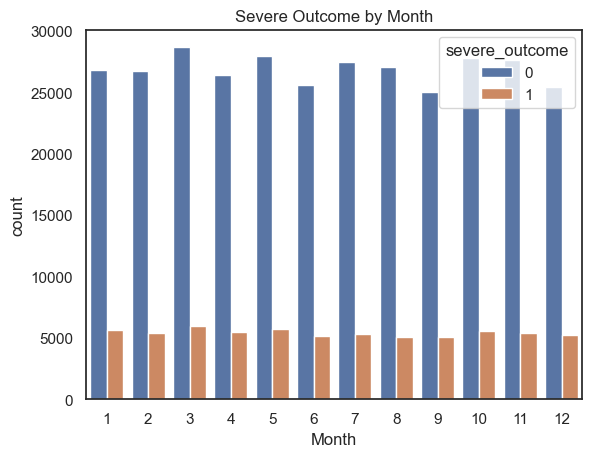

In [50]:
crash_data['accidentdate'] = pd.to_datetime(crash_data['accidentdate'])
# Extract the month from the 'accident date' column
crash_data['month'] = crash_data['accidentdate'].dt.month

# Plot severity outcome against month
sns.countplot(x='month', hue='severe_outcome', data=crash_data)
plt.title('Severe Outcome by Month')
plt.xlabel('Month')
plt.show()

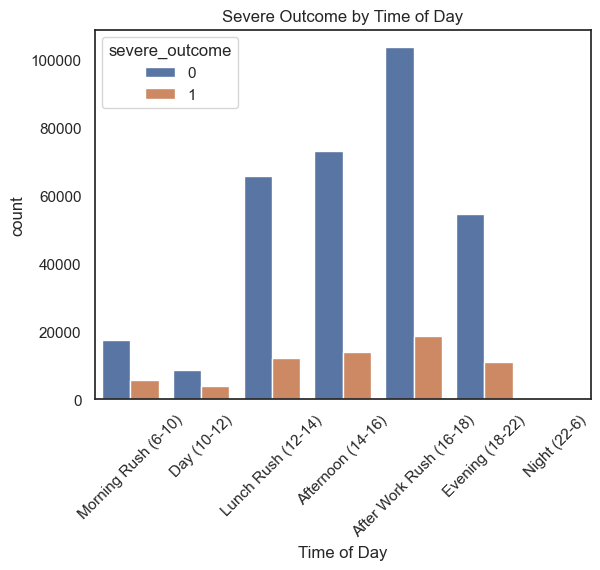

In [51]:
# Define the order of time of day categories
time_of_day_order = ['Morning Rush (6-10)', 'Day (10-12)', 'Lunch Rush (12-14)', 'Afternoon (14-16)', 'After Work Rush (16-18)', 'Evening (18-22)', 'Night (22-6)']

# Plot severity outcome against time of day
sns.countplot(x='time_of_day', hue='severe_outcome', data=crash_data, order=time_of_day_order)
plt.title('Severe Outcome by Time of Day')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

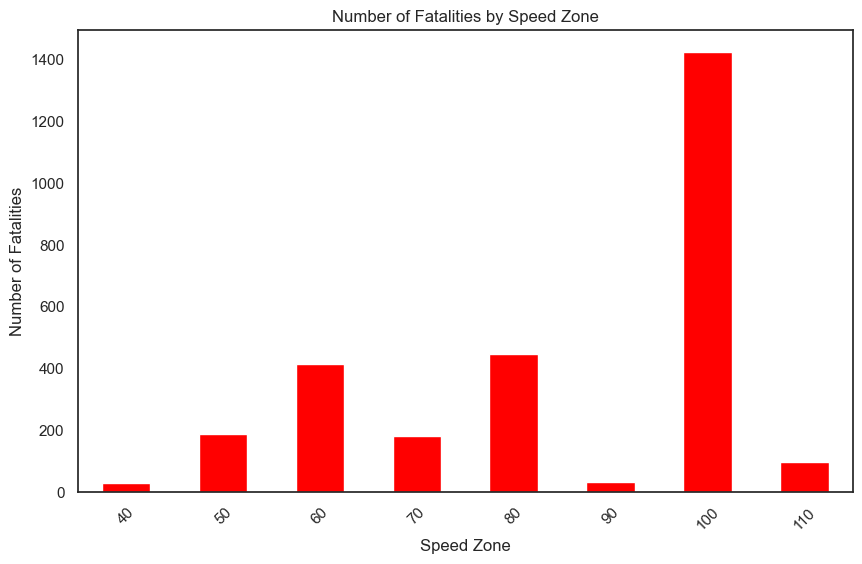

In [94]:
import matplotlib.pyplot as plt

#Filter the data to include only the specified inj_level_desc values
filtered_data = crash_data[crash_data['inj_level_desc'] == 'Fatality']

#Exclude the specified speed_zone values
excluded_speed_zones = [75, 30, 777, 888, 999]
filtered_data = filtered_data[~filtered_data['speed_zone'].isin(excluded_speed_zones)]

#Count the occurrences of each speed_zone
speed_zone_counts = filtered_data['speed_zone'].value_counts()

#Sort the speed_zone counts in ascending order
speed_zone_counts = speed_zone_counts.sort_index()

#Plot the speed_zone counts
plt.figure(figsize=(10, 6))
speed_zone_counts.plot(kind='bar', color='red')
plt.title('Number of Fatalities by Speed Zone')
plt.xlabel('Speed Zone')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.savefig('Fatalities by Speed Zone.png')
plt.show()


C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\441498260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['season'] = crash_data['accidentdate'].dt.month.map({


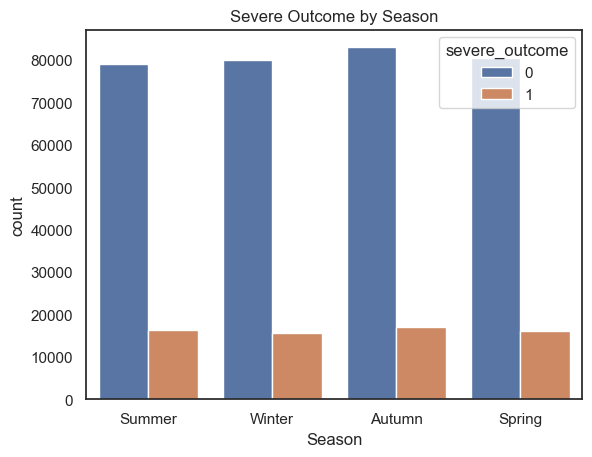

In [52]:
# Create a season column based on the month
crash_data['season'] = crash_data['accidentdate'].dt.month.map({
    12: 'Summer',
    1: 'Summer',
    2: 'Summer',
    3: 'Autumn',
    4: 'Autumn',
    5: 'Autumn',
    6: 'Winter',
    7: 'Winter',
    8: 'Winter',
    9: 'Spring',
    10: 'Spring',
    11: 'Spring'
})

# Plot severity outcome against season
sns.countplot(x='season', hue='severe_outcome', data=crash_data)
plt.title('Severe Outcome by Season')
plt.xlabel('Season')
plt.show()

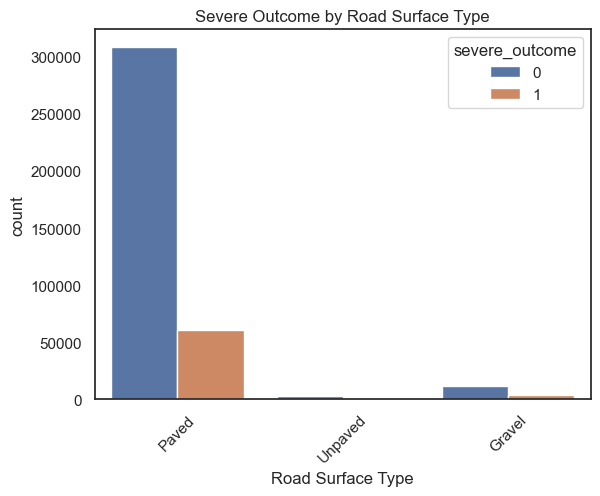

In [53]:
# Plot severity outcome against road surface type
sns.countplot(x='road_surface_type_desc_x', hue='severe_outcome', data=crash_data)
plt.title('Severe Outcome by Road Surface Type')
plt.xlabel('Road Surface Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [54]:
crash_data.groupby('road_surface_type_desc_x')['severe_outcome'].mean() * 100

road_surface_type_desc_x
Gravel     25.120584
Paved      16.334809
Unpaved    25.755668
Name: severe_outcome, dtype: float64

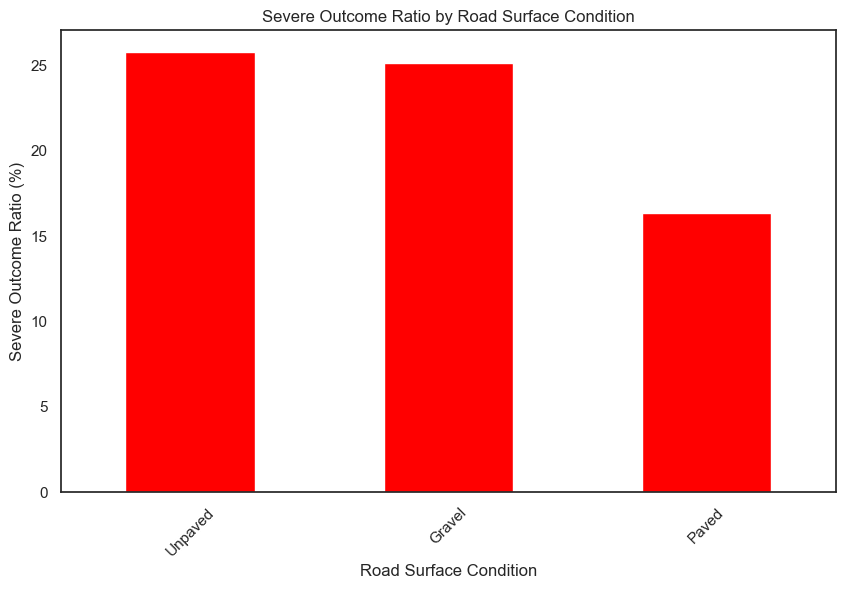

In [59]:
# Group the data by road surface condition and calculate the mean severe outcome ratio
severe_ratio = crash_data.groupby('road_surface_type_desc_x')['severe_outcome'].mean() * 100

# Sort the data in descending order
severe_ratio = severe_ratio.sort_values(ascending=False)

# Plot the ratio of severe outcomes to total accidents
plt.figure(figsize=(10, 6))
ax = severe_ratio.plot(kind='bar', color='red')
plt.title('Severe Outcome Ratio by Road Surface Condition')
plt.xlabel('Road Surface Condition')
plt.ylabel('Severe Outcome Ratio (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Save the image
plt.savefig('severe_outcome_ratio_road_surface.png')

plt.show()

In [56]:
crash_data.groupby('surface_cond_desc')['severe_outcome'].mean() * 100

surface_cond_desc
Dry      16.935651
Icy      11.419878
Muddy    14.096093
Snowy     8.533267
Wet      17.064301
Name: severe_outcome, dtype: float64

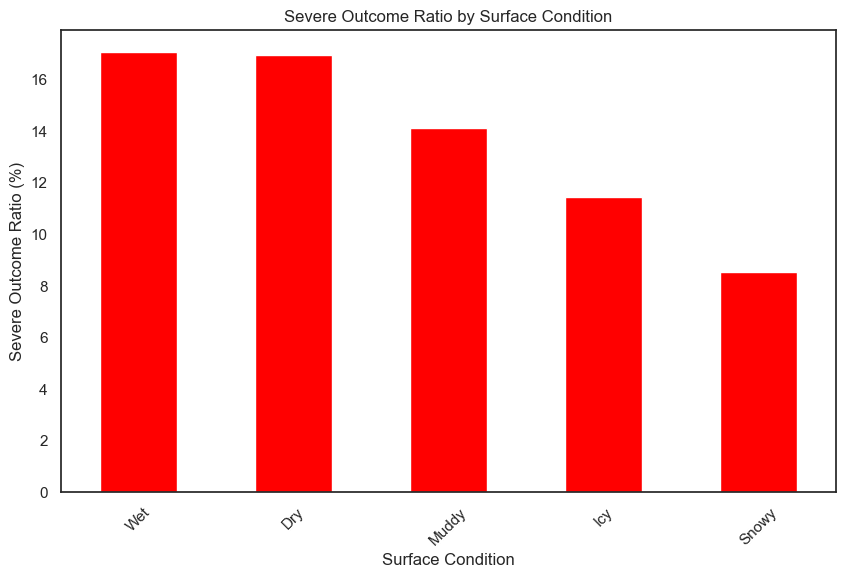

In [58]:
# Group the data by surface condition and calculate the mean severe outcome ratio
severe_ratio = crash_data.groupby('surface_cond_desc')['severe_outcome'].mean() * 100

# Sort the data in descending order
severe_ratio = severe_ratio.sort_values(ascending=False)

# Plot the ratio of severe outcomes to total accidents
plt.figure(figsize=(10, 6))
ax = severe_ratio.plot(kind='bar', color='red')
plt.title('Severe Outcome Ratio by Surface Condition')
plt.xlabel('Surface Condition')
plt.ylabel('Severe Outcome Ratio (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Save the image
plt.savefig('severe_outcome_ratio.png')

plt.show()

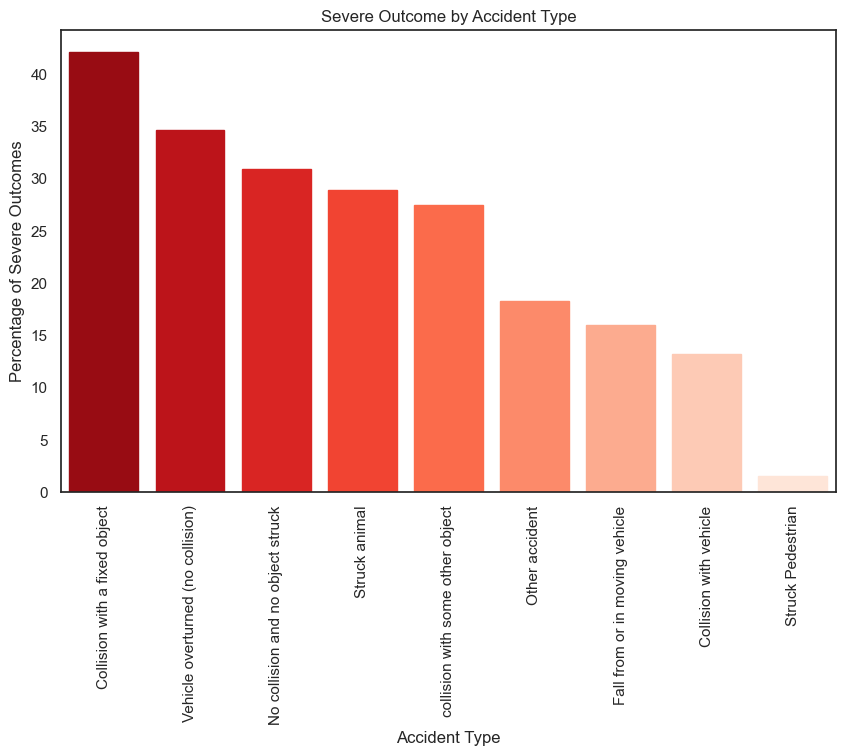

In [60]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean percentage of severe outcomes for each accident type
severe_outcome_percentage = crash_data.groupby('accident_type_desc')['severe_outcome'].mean() * 100

# Sort the values in descending order
severe_outcome_percentage = severe_outcome_percentage.sort_values(ascending=False)

# Define a color palette with shades of red
red_palette = sns.color_palette("Reds_r", len(severe_outcome_percentage))

# Plot the data using the defined color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=severe_outcome_percentage.index, y=severe_outcome_percentage.values, palette=red_palette)
plt.title('Severe Outcome by Accident Type')
plt.xlabel('Accident Type')
plt.ylabel('Percentage of Severe Outcomes')
plt.xticks(rotation=90)

# Adjust the color intensity based on the percentage values
for i, value in enumerate(severe_outcome_percentage):
    color = red_palette[i]
    plt.gca().get_children()[i].set_color(color)

plt.show()

In [115]:
 crash_data.groupby('accident_type_desc')['severe_outcome'].mean() * 100

accident_type_desc
Collision with a fixed object        42.095233
Collision with vehicle               13.215237
Fall from or in moving vehicle       15.987295
No collision and no object struck    30.906640
Other accident                       18.248175
Struck Pedestrian                     1.494806
Struck animal                        28.868472
Vehicle overturned (no collision)    34.636194
collision with some other object     27.463395
Name: severe_outcome, dtype: float64

In [73]:
crash_data.groupby('road_geometry_desc')['severe_outcome'].mean() * 100

road_geometry_desc
Cross intersection       12.474668
Dead end                 23.843416
Multiple intersection    14.154517
Not at intersection      20.476220
Private property         20.253165
Road closure             17.857143
T intersection           14.829141
Y intersection           15.430017
Name: severe_outcome, dtype: float64

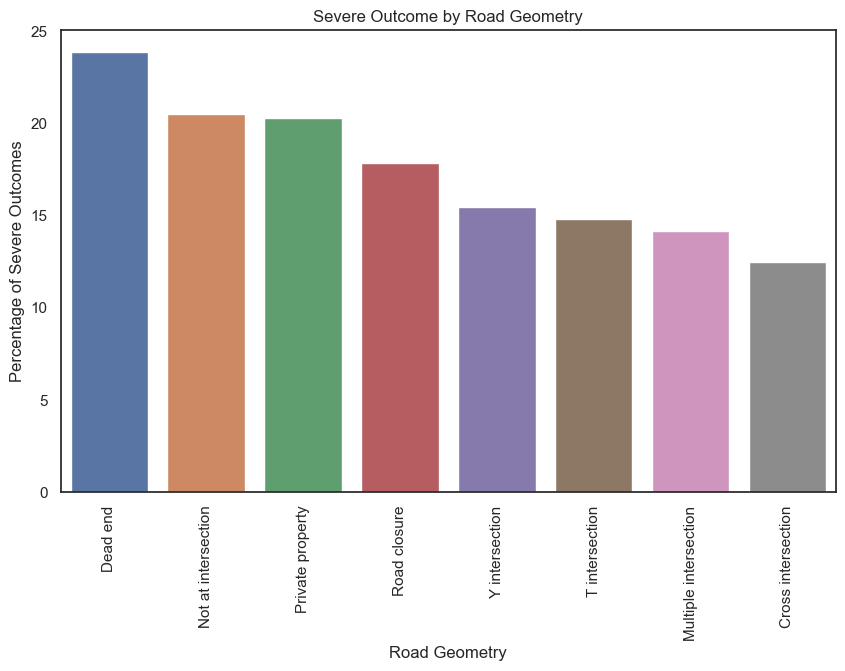

In [74]:
# Calculate the mean percentage of severe outcomes for each road geometry
severe_outcome_percentage = crash_data.groupby('road_geometry_desc')['severe_outcome'].mean() * 100

# Sort the values in descending order
severe_outcome_percentage = severe_outcome_percentage.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=severe_outcome_percentage.index, y=severe_outcome_percentage.values)
plt.title('Severe Outcome by Road Geometry')
plt.xlabel('Road Geometry')
plt.ylabel('Percentage of Severe Outcomes')
plt.xticks(rotation=90)
plt.show()

In [57]:
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome,condensed_years,weekday,weekend,seasons,time_of_day,month,season
0,T20060000010,A,M,60+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+,0,0,10,True,False,1,Afternoon (14-16),1,Summer
1,T20060000010,B,F,60+,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+,1,0,3,True,False,1,Afternoon (14-16),1,Summer
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+,0,0,5,True,False,1,Afternoon (14-16),1,Summer
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2,0,0,8,True,False,1,Evening (18-22),1,Summer
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2,1,0,15,True,False,1,Evening (18-22),1,Summer


In [75]:
crash_data.groupby('light_condition_desc')['severe_outcome'].mean() * 100

light_condition_desc
Dark No street lights         31.724887
Dark Street lights off        12.803644
Dark Street lights on         18.333815
Dark Street lights unknown    12.083518
Day                           15.589931
Dusk/Dawn                     16.239446
Name: severe_outcome, dtype: float64

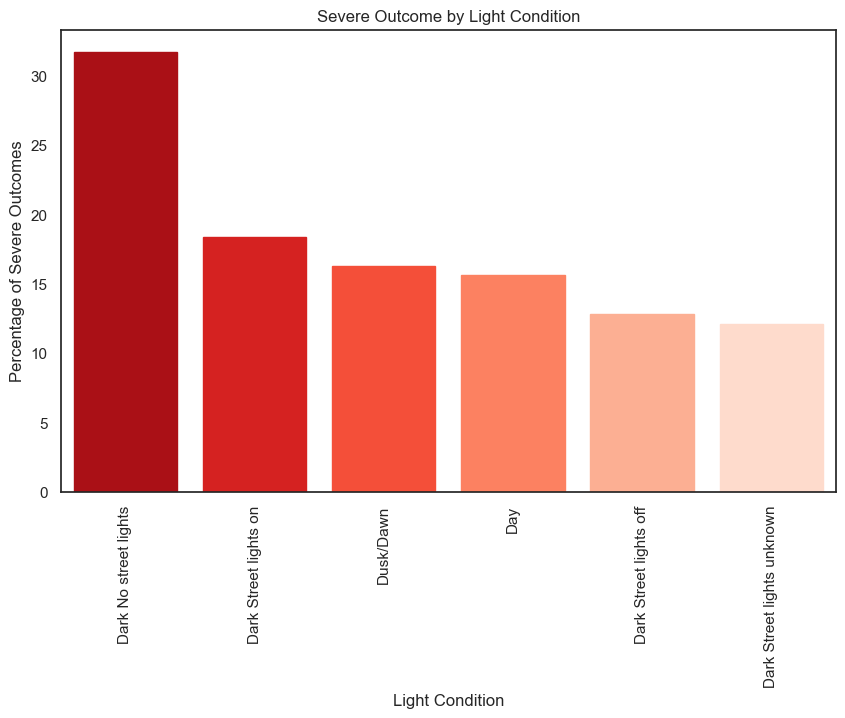

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean percentage of severe outcomes for each light condition
severe_outcome_percentage = crash_data.groupby('light_condition_desc')['severe_outcome'].mean() * 100

# Sort the values in descending order
severe_outcome_percentage = severe_outcome_percentage.sort_values(ascending=False)

# Define a color palette with shades of red
red_palette = sns.color_palette("Reds_r", len(severe_outcome_percentage))

# Plot the data using the defined color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=severe_outcome_percentage.index, y=severe_outcome_percentage.values, palette=red_palette)
plt.title('Severe Outcome by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Percentage of Severe Outcomes')
plt.xticks(rotation=90)

# Adjust the color intensity based on the percentage values
for i, value in enumerate(severe_outcome_percentage):
    color = red_palette[i]
    plt.gca().get_children()[i].set_color(color)

plt.show()

In [77]:
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome,condensed_years,weekday,weekend,seasons,time_of_day,month,season
0,T20060000010,A,M,60+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+,0,0,10,True,False,1,Afternoon (14-16),1,Summer
1,T20060000010,B,F,60+,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+,1,0,3,True,False,1,Afternoon (14-16),1,Summer
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+,0,0,5,True,False,1,Afternoon (14-16),1,Summer
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2,0,0,8,True,False,1,Evening (18-22),1,Summer
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2,1,0,15,True,False,1,Evening (18-22),1,Summer


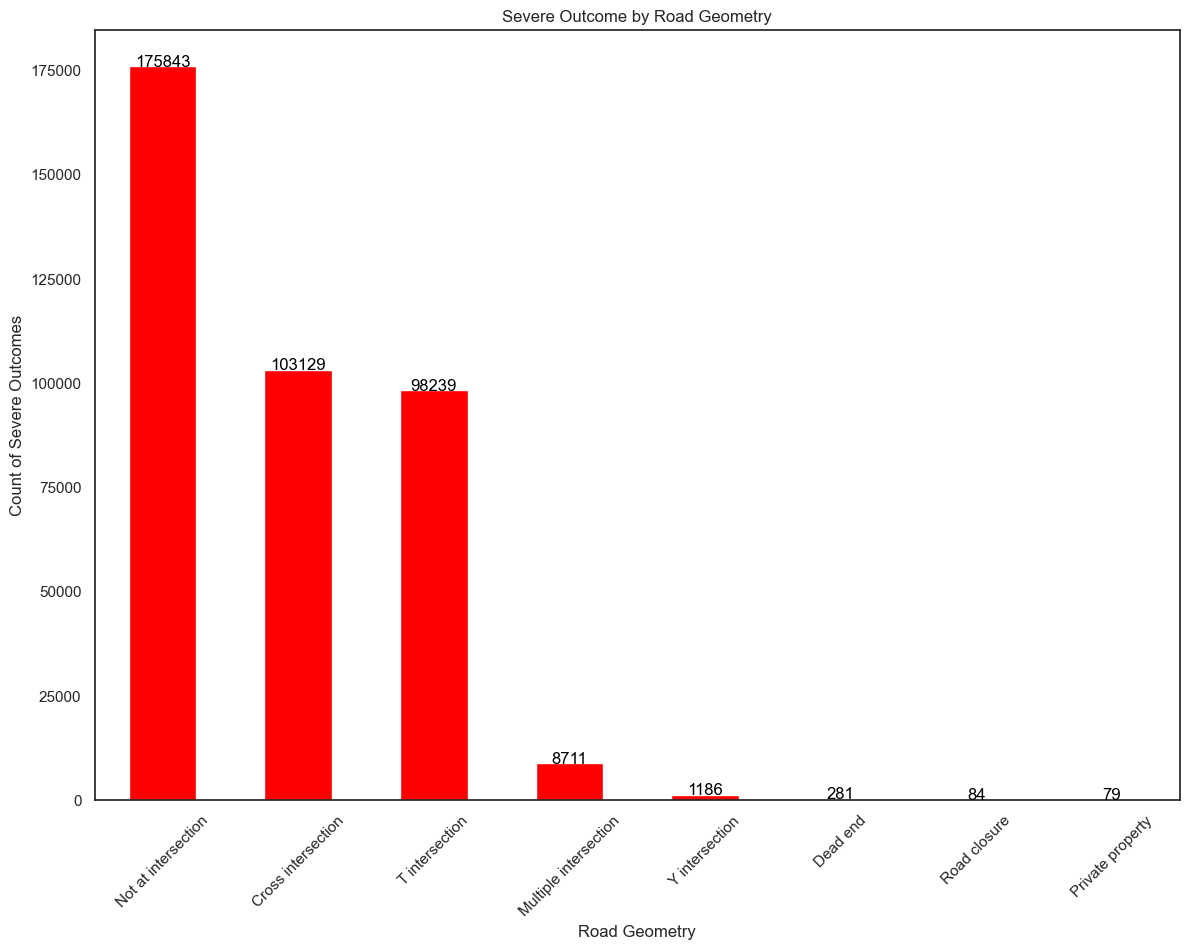

In [86]:
#Group the data by road geometry description and calculate the count of severe outcomes
severity_by_road_geometry = crash_data.groupby('road_geometry_desc')['severe_outcome'].count()

#Sort the data in descending order
severity_by_road_geometry = severity_by_road_geometry.sort_values(ascending=False)

#Plot the count of severe outcomes by road geometry description
plt.figure(figsize=(14, 10))
ax = severity_by_road_geometry.plot(kind='bar', color='red')
plt.title('Severe Outcome by Road Geometry')
plt.xlabel('Road Geometry')
plt.ylabel('Count of Severe Outcomes')
plt.xticks(rotation=45)

#Display counts above each bar
for i, v in enumerate(severity_by_road_geometry):
    ax.text(i, v + 1, str(v), color='black', ha='center')

plt.savefig('severity_by_road_geometry.png') # Save the image
plt.show()

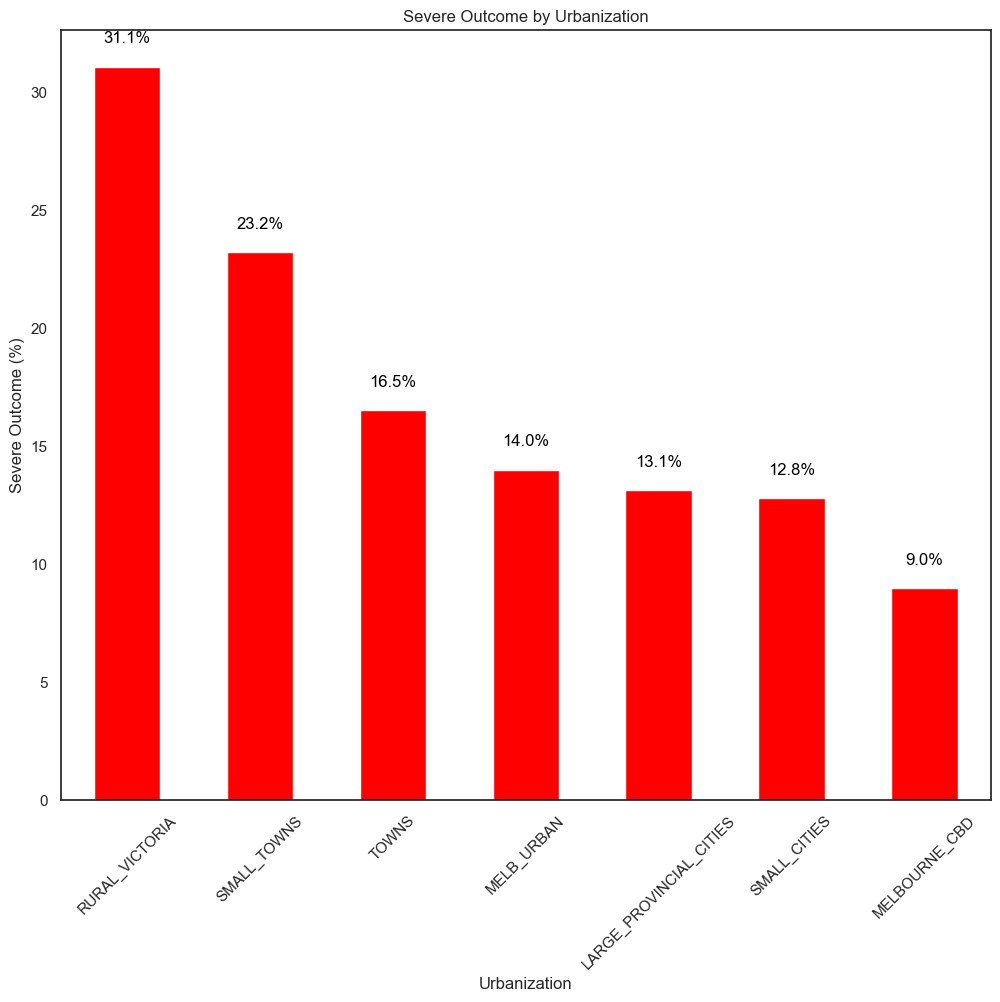

In [89]:

import matplotlib.pyplot as plt

# Group the data by urbanization and calculate the mean severity outcome
severity_by_urbanization = crash_data.groupby('deg_urban_name')['severe_outcome'].mean() * 100

# Sort the data in descending order
severity_by_urbanization = severity_by_urbanization.sort_values(ascending=False)

# Plot the severity outcome by urbanization
plt.figure(figsize=(12, 10))
ax = severity_by_urbanization.plot(kind='bar', color='red')
plt.title('Severe Outcome by Urbanization')
plt.xlabel('Urbanization')
plt.ylabel('Severe Outcome (%)')
plt.xticks(rotation=45)

# Display percentages above each bar
for i, v in enumerate(severity_by_urbanization):
    ax.text(i, v + 1, f'{v:.1f}%', color='black', ha='center')

plt.savefig('severity_by_urbanization.png') # Save the image
plt.show()

In [79]:
 crash_data.groupby('deg_urban_name')['severe_outcome'].mean() * 100

deg_urban_name
LARGE_PROVINCIAL_CITIES    13.148840
MELBOURNE_CBD               8.996350
MELB_URBAN                 14.004267
RURAL_VICTORIA             31.080548
SMALL_CITIES               12.797238
SMALL_TOWNS                23.228883
TOWNS                      16.505885
Name: severe_outcome, dtype: float64

In [80]:
crash_data.speed_zone.value_counts()

60     144023
50      59473
80      58794
100     49885
70      33078
999     18160
40      16801
110      3359
90       1929
888      1170
30        407
777       365
75        108
Name: speed_zone, dtype: int64

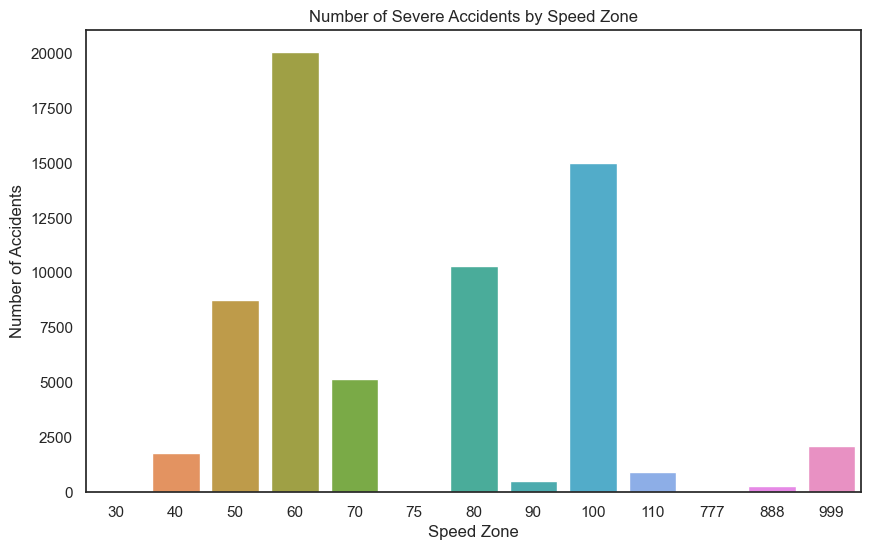

In [81]:
severe_speed_zone = crash_data[crash_data['severe_outcome'] == 1]['speed_zone'].value_counts()

# Plot the number of severe accidents by speed zone
plt.figure(figsize=(10, 6))
sns.barplot(x=severe_speed_zone.index, y=severe_speed_zone.values)
plt.title('Number of Severe Accidents by Speed Zone')
plt.xlabel('Speed Zone')
plt.ylabel('Number of Accidents')
plt.show()

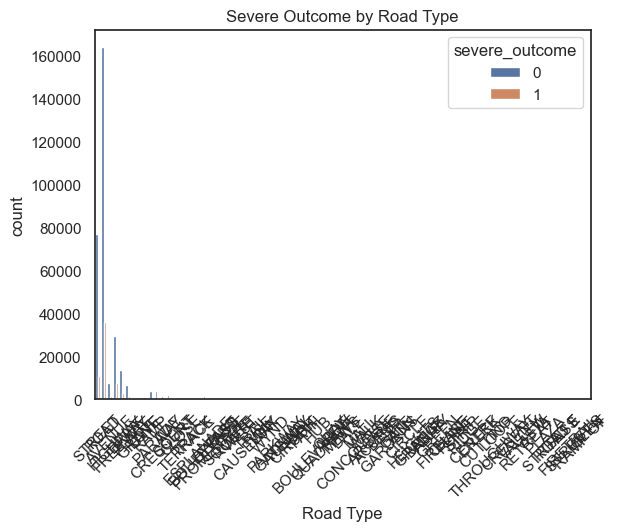

In [82]:
sns.countplot(x='road_type', hue='severe_outcome', data=crash_data)
plt.title('Severe Outcome by Road Type')
plt.xlabel('Road Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [83]:
 crash_data.groupby('road_type')['severe_outcome'].mean() * 100

road_type
               13.698630
ACCESS          0.000000
ALLEY           7.692308
ARCADE          0.000000
AVENUE         15.800796
BEND           55.555556
BOULEVARD      15.392304
BOULEVARDE     24.000000
BREAK          69.230769
BYPASS         12.500000
CAUSEWAY       14.814815
CENTRE          0.000000
CHASE          50.000000
CIRCLE         16.666667
CIRCUIT        20.472441
CLOSE          20.430108
CONCOURSE      16.666667
COURT          19.071146
CREEK         100.000000
CRESCENT       19.276458
CRESENT         0.000000
CUTTING       100.000000
DALE            0.000000
DRIVE          18.435415
E               0.000000
EAST           15.744681
ESPLANADE      13.953488
FIRELINE       42.857143
FIRETRAIL       0.000000
FREEWAY        16.976502
GARDENS        12.500000
GATE           50.000000
GATEWAY        60.000000
GLEN            0.000000
GRANGE         33.333333
GREEN           0.000000
GROVE          16.134752
HEIGHTS       100.000000
HIGHWAY        20.153722
HUB            

In [84]:
crash_data['road_type'].value_counts()

ROAD          199945
STREET         87877
HIGHWAY        37080
FREEWAY        16299
AVENUE          9297
DRIVE           8245
PARADE          4720
RAMP            4441
WAY             2333
BOULEVARD       2001
CRESCENT        1852
LANE            1662
TRACK           1418
COURT           1012
BYPASS           672
PLACE            566
GROVE            564
TERRACE          542
EAST             470
WEST             311
ESPLANADE        215
TUNNEL           204
CLOSE            186
CIRCUIT          127
CAUSEWAY         108
LINK              93
PROMENADE         82
                  73
SQUARE            72
PATH              47
RISE              45
PARKWAY           43
ALLEY             39
BOULEVARDE        25
RUN               23
WALK              14
BREAK             13
BEND               9
GARDENS            8
FIRELINE           7
RIDGE              6
POINT              6
PLAZA              6
CIRCLE             6
MEWS               6
TRAIL              6
CONCOURSE          6
QUADRANT     

In [87]:
# Define the road types to be grouped
grouped_road_types = ['ROAD', 'STREET', 'HIGHWAY', 'AVENUE', 'DRIVE', 'FREEWAY']

# Create a new column 'road_type_group' and assign the road types to their respective categories
crash_data['road_type_group'] = crash_data['road_type'].apply(lambda x: x if x in grouped_road_types else 'Other')

# Count the occurrences of each road type group
grouped_counts = crash_data['road_type_group'].value_counts()
grouped_counts

ROAD       199945
STREET      87877
HIGHWAY     37080
Other       28809
FREEWAY     16299
AVENUE       9297
DRIVE        8245
Name: road_type_group, dtype: int64

In [88]:
 crash_data.groupby('road_type_group')['severe_outcome'].mean() * 100

road_type_group
AVENUE     15.800796
DRIVE      18.435415
FREEWAY    16.976502
HIGHWAY    20.153722
Other      17.018987
ROAD       18.074470
STREET     12.155627
Name: severe_outcome, dtype: float64

In [89]:
 crash_data.groupby('time_of_day')['severe_outcome'].mean() * 100

time_of_day
After Work Rush (16-18)    15.177387
Afternoon (14-16)          16.068758
Day (10-12)                30.825778
Evening (18-22)            16.739765
Lunch Rush (12-14)         15.562744
Morning Rush (6-10)        24.436484
Name: severe_outcome, dtype: float64

In [90]:
 crash_data.groupby('season')['severe_outcome'].mean() * 100

season
Autumn    17.094162
Spring    16.568188
Summer    17.073888
Winter    16.290444
Name: severe_outcome, dtype: float64

In [91]:
 crash_data.groupby('condensed_years')['severe_outcome'].mean() * 100

condensed_years
1     14.599939
2     14.049844
3     13.646358
4     14.128067
5     14.115979
6     14.469519
7     14.610542
8     14.992959
9     15.619469
10    15.940309
11    15.581286
12    16.531397
13    17.219272
14    16.959676
15    17.102818
16    18.314382
17    18.356817
18    20.734694
19    20.177540
20    21.852458
Name: severe_outcome, dtype: float64

In [66]:
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome,condensed_years,weekday,weekend,seasons,time_of_day,month,season
0,T20060000010,A,M,60+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+,0,0,10,True,False,1,Afternoon (14-16),1,Summer
1,T20060000010,B,F,60+,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+,1,0,3,True,False,1,Afternoon (14-16),1,Summer
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+,0,0,5,True,False,1,Afternoon (14-16),1,Summer
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2,0,0,8,True,False,1,Evening (18-22),1,Summer
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2,1,0,15,True,False,1,Evening (18-22),1,Summer


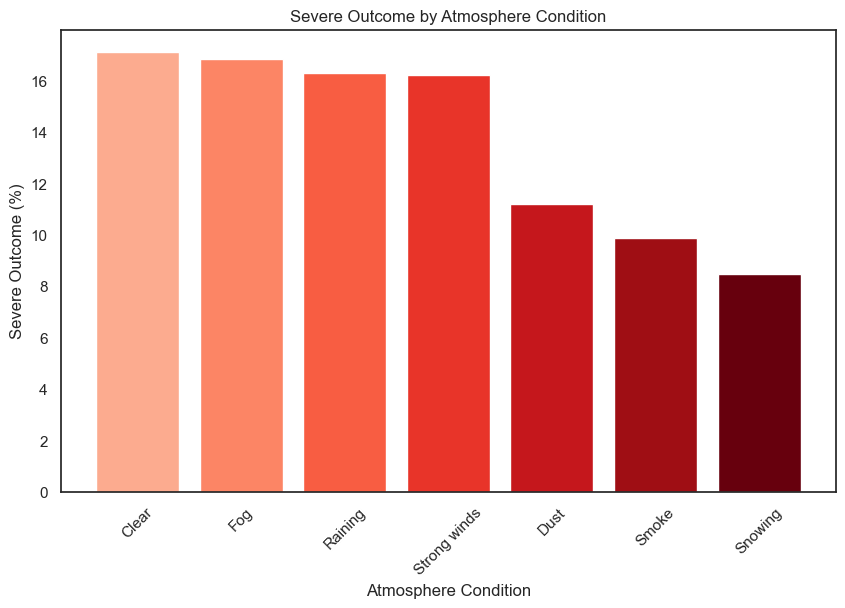

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by atmosphere condition and calculate the mean severity outcome
severity_by_atomsph_cond = crash_data.groupby('atmosph_cond_desc')['severe_outcome'].mean() * 100

# Sort the values in descending order
severity_by_atomsph_cond = severity_by_atomsph_cond.sort_values(ascending=False)

# Define a color palette with weakened red color
red_palette = plt.cm.Reds(np.linspace(0.3, 1, len(severity_by_atomsph_cond)))

# Plot the severity outcome by atmosphere condition using the defined color palette
plt.figure(figsize=(10, 6))
plt.bar(severity_by_atomsph_cond.index, severity_by_atomsph_cond.values, color=red_palette)
plt.title('Severe Outcome by Atmosphere Condition')
plt.xlabel('Atmosphere Condition')
plt.ylabel('Severe Outcome (%)')
plt.xticks(rotation=45)
plt.savefig('severity_by_atmosphere.png') # Save the image
plt.show()

In [75]:
crash_data.groupby('atmosph_cond_desc')['severe_outcome'].mean() * 100

atmosph_cond_desc
Clear           17.099335
Dust            11.153279
Fog             16.788426
Raining         16.291579
Smoke            9.912603
Snowing          8.470077
Strong winds    16.211415
Name: severe_outcome, dtype: float64

C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\2768071368.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['seatbelt_restraint_type_desc'] = crash_data['helmet_belt_worn'].map(seatbelt_mapping)


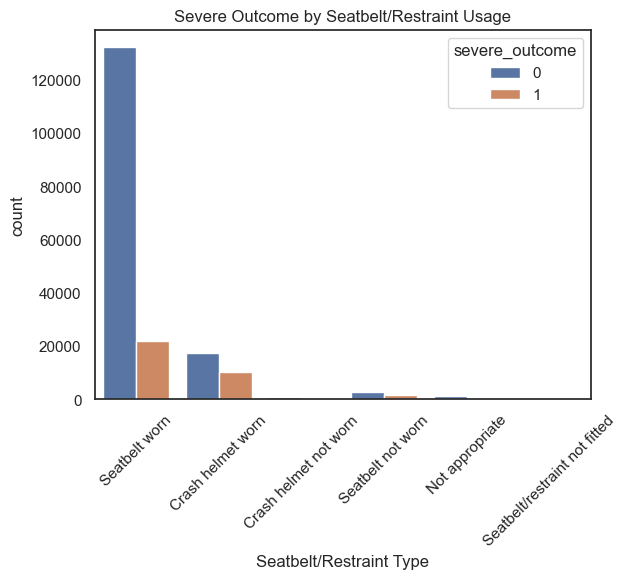

In [67]:

# Define the mapping from numeric codes to names
seatbelt_mapping = {
    1: 'Seatbelt worn',
    2: 'Seatbelt not worn',
    3: 'Child restraint worn',
    4: 'Child restraint not worn',
    5: 'Seatbelt/restraint not fitted',
    6: 'Crash helmet worn',
    7: 'Crash helmet not worn',
    8: 'Not appropriate'
}

# Map the numeric codes to names in the column
crash_data['seatbelt_restraint_type_desc'] = crash_data['helmet_belt_worn'].map(seatbelt_mapping)

# Filter the dataset for the specified categories
seatbelt_data = crash_data[crash_data['seatbelt_restraint_type_desc'].isin(list(seatbelt_mapping.values()))]

# Plot the severity outcome based on seatbelt/restraint usage
sns.countplot(x='seatbelt_restraint_type_desc', hue='severe_outcome', data=seatbelt_data)
plt.title('Severe Outcome by Seatbelt/Restraint Usage')
plt.xlabel('Seatbelt/Restraint Type')
plt.xticks(rotation=45)
plt.show()

In [71]:
crash_data.groupby('seatbelt_restraint_type_desc')['severe_outcome'].mean() * 100

seatbelt_restraint_type_desc
Crash helmet not worn            44.155058
Crash helmet worn                37.388417
Not appropriate                  11.102484
Seatbelt not worn                34.159176
Seatbelt worn                    14.304782
Seatbelt/restraint not fitted    17.508418
Name: severe_outcome, dtype: float64

In [72]:
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome,condensed_years,weekday,weekend,seasons,time_of_day,month,season,seatbelt_restraint_type_desc
0,T20060000010,A,M,60+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+,0,0,10,True,False,1,Afternoon (14-16),1,Summer,Seatbelt worn
1,T20060000010,B,F,60+,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+,1,0,3,True,False,1,Afternoon (14-16),1,Summer,Seatbelt worn
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+,0,0,5,True,False,1,Afternoon (14-16),1,Summer,Seatbelt worn
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2,0,0,8,True,False,1,Evening (18-22),1,Summer,Seatbelt worn
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2,1,0,15,True,False,1,Evening (18-22),1,Summer,Seatbelt worn


In [73]:
# Create a new column 'safety_equipment_worn'
crash_data['safety_equipment_worn'] = crash_data['seatbelt_restraint_type_desc'].map({
    'Crash helmet not worn': 'No',
    'Crash helmet worn': 'Yes',
    'Not appropriate': 'No',
    'Seatbelt not worn': 'No',
    'Seatbelt worn': 'Yes',
    'Seatbelt/restraint not fitted': 'No'
})

# Calculate the percentage of severe outcome by safety equipment worn
severe_outcome_by_safety = crash_data.groupby('safety_equipment_worn')['severe_outcome'].mean() * 100

# Print the result
print(severe_outcome_by_safety)

safety_equipment_worn
No     31.307141
Yes    17.850131
Name: severe_outcome, dtype: float64


C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\1746384896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['safety_equipment_worn'] = crash_data['seatbelt_restraint_type_desc'].map({


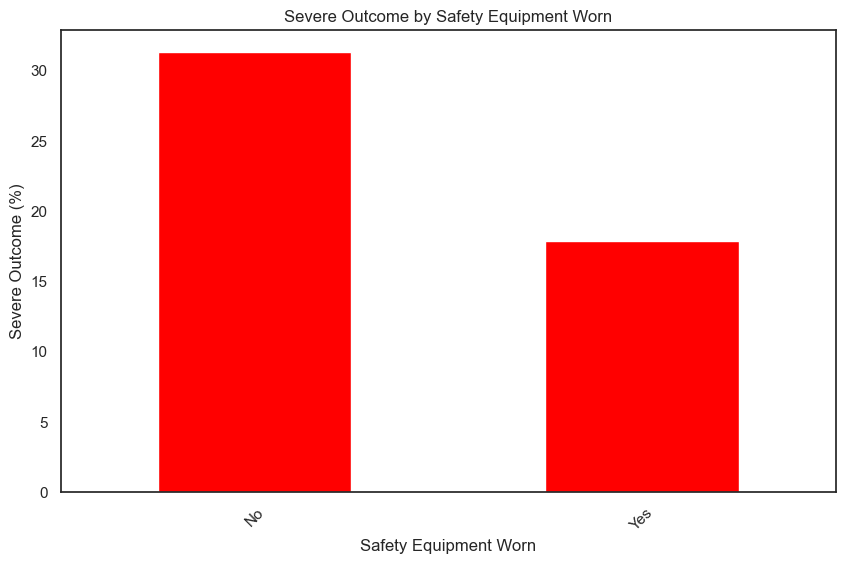

In [74]:
# Group the data by safety equipment worn and calculate the mean severity outcome
severe_outcome_by_safety = crash_data.groupby('safety_equipment_worn')['severe_outcome'].mean() * 100

# Plot the mean severity outcome by safety equipment worn
plt.figure(figsize=(10, 6))
severe_outcome_by_safety.plot(kind='bar', color='red')
plt.title('Severe Outcome by Safety Equipment Worn')
plt.xlabel('Safety Equipment Worn')
plt.ylabel('Severe Outcome (%)')
plt.xticks(rotation=45)

plt.show()

In [75]:
crash_data.groupby('age_group')['severe_outcome'].mean() * 100

age_group
16-17       18.184542
17-21       17.480171
22-25       16.452364
26-29       15.230991
30-39       15.218755
40-49       15.924936
50-59       16.818077
60+         20.854045
Under 17    13.720830
Name: severe_outcome, dtype: float64

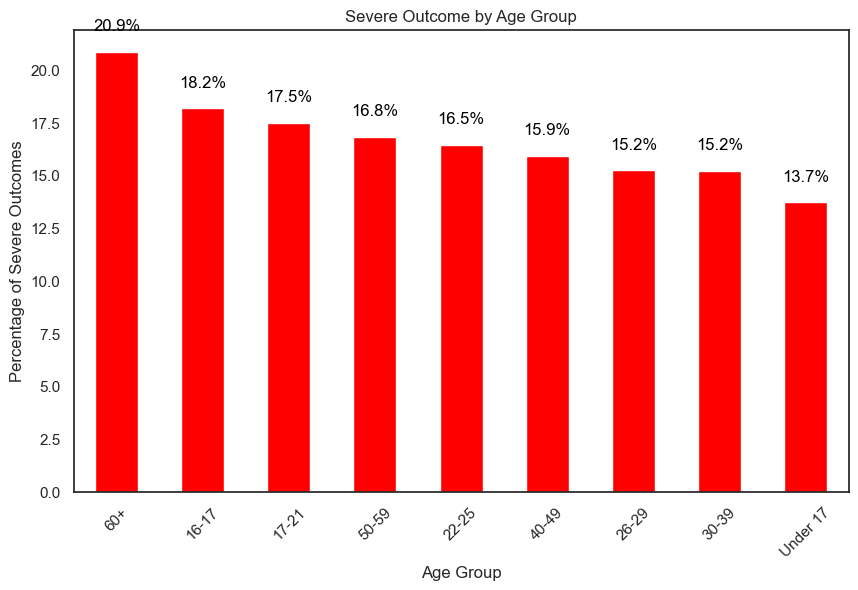

In [76]:
# Calculate the mean percentage of severe outcomes for each age group
age_group_severe_outcome_percentage = crash_data.groupby('age_group')['severe_outcome'].mean() * 100

# Sort the values in descending order
age_group_severe_outcome_percentage = age_group_severe_outcome_percentage.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
ax = age_group_severe_outcome_percentage.plot(kind='bar', color='red')
plt.title('Severe Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Severe Outcomes')
plt.xticks(rotation=45)

# Display percentages above each bar
for i, v in enumerate(age_group_severe_outcome_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', color='black', ha='center')

plt.show()

In [83]:
crash_data.groupby('condensed_no_of_vehicles')['severe_outcome'].mean() * 100

condensed_no_of_vehicles
1     30.729541
2     14.353142
3+    10.022316
Name: severe_outcome, dtype: float64

In [86]:
crash_data.head()
crash_data.groupby('total_no_occupants')['severe_outcome'].mean() * 100

total_no_occupants
0.0       8.333333
1.0      17.702897
2.0      13.665646
3.0      12.031482
4.0      11.919307
5.0      12.199700
6.0      14.315789
7.0      17.610063
8.0      11.764706
9.0       8.695652
10.0      0.000000
11.0      6.250000
12.0     15.384615
13.0     11.111111
14.0      0.000000
15.0     37.500000
16.0      0.000000
17.0      0.000000
18.0      0.000000
19.0     75.000000
20.0     13.333333
21.0      0.000000
22.0     50.000000
23.0      0.000000
24.0      0.000000
25.0      0.000000
27.0      0.000000
28.0      0.000000
29.0    100.000000
30.0      0.000000
31.0      0.000000
32.0      0.000000
33.0      0.000000
34.0      0.000000
35.0      0.000000
37.0      0.000000
40.0      0.000000
Name: severe_outcome, dtype: float64

In [87]:
crash_data.groupby('condensed_total_occupants')['severe_outcome'].mean() * 100

condensed_total_occupants
1     17.702897
2     13.665646
3     12.031482
4     11.919307
5+    12.580017
Name: severe_outcome, dtype: float64

In [90]:
crash_data['no_persons'].value_counts()

2     175720
3      81733
1      48218
4      39325
5      21459
6      11158
7       5385
8       2949
9       1565
10       839
11       521
12       299
13       186
14       149
15       141
17        65
16        55
21        25
28        22
22        20
18        14
20        11
29        10
19        10
35         8
27         7
38         6
32         6
48         5
40         5
23         5
41         4
33         3
25         3
31         2
37         2
67         2
24         2
36         2
50         2
97         1
45         1
30         1
89         1
54         1
51         1
Name: no_persons, dtype: int64

In [92]:
# Create a dictionary to map the number of persons to the condensed categories
condensed_categories = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
}

# Function to condense the number of persons
def condense_persons_count(count):
    if count == 1:
        return 1
    elif count == 2 :
        return 2
    elif count == 3:
        return 3
    elif count == 4:
        return 4
    else:
        return "5+"

# Apply the condensing function to the "no_persons" column
crash_data['no_people_involved'] = crash_data['no_persons'].apply(condense_persons_count)



In [93]:
crash_data.groupby('no_people_involved')['severe_outcome'].mean() * 100

no_people_involved
1     44.205483
2     14.081493
3     12.416038
4     11.287985
5+    10.277401
Name: severe_outcome, dtype: float64

In [94]:
crash_data.groupby('day_week_description')['severe_outcome'].mean() * 100

day_week_description
Friday       15.766667
Monday       16.140970
Saturday     19.307590
Sunday       20.902635
Thursday     15.779320
Tuesday      15.288412
Wednesday    15.393425
Name: severe_outcome, dtype: float64

In [78]:
# Create a dictionary to map the days of the week to the condensed categories
condensed_categories = {
    'Monday': 'Weekday',
    'Tuesday': 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday': 'Weekday',
    'Friday': 'Weekday',
    'Saturday': 'Weekend',
    'Sunday': 'Weekend',
}

# Function to condense the day of the week
def condense_day_of_week(day):
    return condensed_categories[day]

# Apply the condensing function to the "day_week_description" column
crash_data['Weekday/Weekend'] = crash_data['day_week_description'].apply(condense_day_of_week)

C:\Users\saidj\AppData\Local\Temp\ipykernel_40484\535022395.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['Weekday/Weekend'] = crash_data['day_week_description'].apply(condense_day_of_week)


In [79]:
crash_data.groupby('Weekday/Weekend')['severe_outcome'].mean() * 100

Weekday/Weekend
Weekday    15.690455
Weekend    20.057962
Name: severe_outcome, dtype: float64

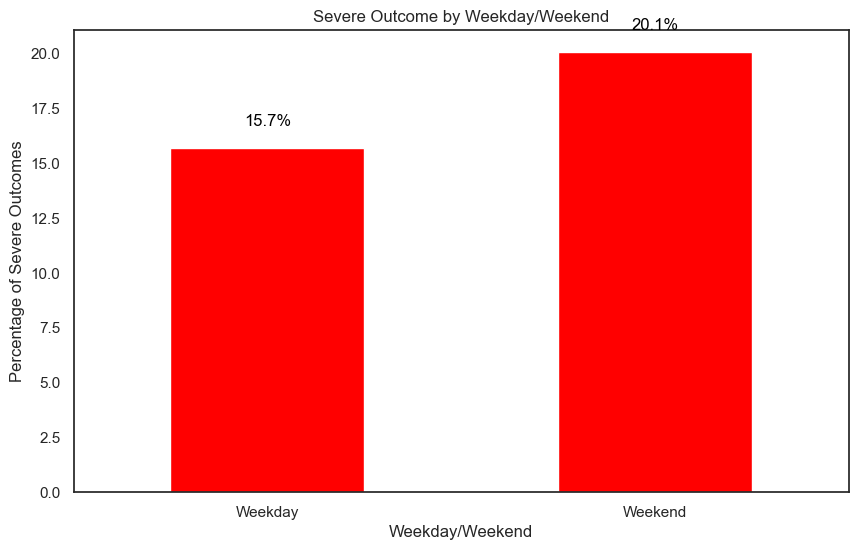

In [80]:
# Calculate the mean percentage of severe outcomes for weekdays and weekends
weekday_weekend_severe_outcome_percentage = crash_data.groupby('Weekday/Weekend')['severe_outcome'].mean() * 100

# Plot the data
plt.figure(figsize=(10, 6))
ax = weekday_weekend_severe_outcome_percentage.plot(kind='bar', color='red')
plt.title('Severe Outcome by Weekday/Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Percentage of Severe Outcomes')
plt.xticks(rotation=0)

# Display percentages above each bar
for i, v in enumerate(weekday_weekend_severe_outcome_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', color='black', ha='center')

plt.show()

In [97]:
crash_data.columns


Index(['accident_no', 'vehicle_id', 'sex', 'age_group', 'inj_level_desc',
       'seating_position', 'helmet_belt_worn', 'road_user_type',
       'road_user_type_desc', 'accidentdate', 'accidenttime',
       'accident_type_desc', 'day_week_description', 'dca_description',
       'light_condition_desc', 'no_persons', 'no_persons_killed',
       'road_geometry', 'road_geometry_desc', 'severity', 'speed_zone',
       'surface_cond_desc', 'road_name', 'road_type', 'distance_location',
       'lga_name', 'region_name', 'deg_urban_name', 'lat', 'long',
       'postcode_no', 'atmosph_cond_desc', 'vehicle_year_manuf',
       'road_surface_type_desc_x', 'vehicle_type_desc_x', 'total_no_occupants',
       'traffic_control_desc_x', 'severity_level', 'year_of_vehicle',
       'road_surface_type_desc_y', 'reg_state', 'vehicle_body_style',
       'vehicle_make', 'vehicle_model', 'condensed_vehicle_type',
       'condensed_total_occupants', 'condensed_no_of_vehicles', 'inj_binary',
       'severe_out

In [101]:
crash_data.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,year_of_vehicle,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome,condensed_years,seasons,time_of_day,month,season,seatbelt_restraint_type_desc,no_people_involved,Weekday/Weekend
0,T20060000010,A,M,60+,Not injured,D,1,2,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,Clear,1996.0,Paved,Car,2.0,Stop-go lights,10.0,SEDAN,MITSUB,MAGNA,Car,2,3+,0,0,10,1,Afternoon (14-16),1,Summer,Seatbelt worn,5+,Weekday
1,T20060000010,B,F,60+,Other injury,D,1,2,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,Clear,2003.0,Paved,Car,1.0,Stop-go lights,3.0,COUPE,UNKN,GETZ,Car,1,3+,1,0,3,1,Afternoon (14-16),1,Summer,Seatbelt worn,5+,Weekday
2,T20060000010,C,M,30-39,Not injured,D,1,2,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,5.0,SEDAN,FORD,FALCON,Car,3,3+,0,0,5,1,Afternoon (14-16),1,Summer,Seatbelt worn,5+,Weekday
3,T20060000018,A,M,30-39,Not injured,D,1,2,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,Clear,1998.0,Paved,Utility,1.0,No control,8.0,DC UTE,TOYOTA,HILXU,Car,1,2,0,0,8,1,Evening (18-22),1,Summer,Seatbelt worn,4,Weekday
4,T20060000018,B,F,17-21,Other injury,D,1,2,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,Clear,1991.0,Paved,Car,3.0,Giveway sign,15.0,SEDAN,SUBARU,LIBER,Car,3,2,1,0,15,1,Evening (18-22),1,Summer,Seatbelt worn,4,Weekday


In [102]:
crash_data.groupby('traffic_control_desc_x')['severe_outcome'].mean() * 100

traffic_control_desc_x
Flashing lights    10.061920
Giveway sign       13.199088
No control         19.739406
Other              14.352457
Out of order       13.090627
Ped. crossing       6.935533
Ped. lights         9.348583
Police             12.356101
RX Bells/Lights    11.277330
RX Gates/Booms     11.414214
RX No control       9.737418
Roundabout         11.969248
School Flags       10.321324
School No flags     9.436133
Stop sign          13.881878
Stop-go lights     11.518654
Name: severe_outcome, dtype: float64

In [67]:
X = crash_data.drop(['accident_no', 'vehicle_id', 'seating_position', 'road_user_type', 'road_user_type_desc', 'lga_name', 'vehicle_make', 'inj_level_desc', 'accidentdate', 'accidenttime', 'no_persons_killed', 'road_name', 'severity', 'lat', 'long', 'region_name', 'postcode_no', 'severe_outcome', 'vehicle_year_manuf', 'total_no_occupants', 'severity_level', 'road_surface_type_desc_y', 'inj_binary', 'day_week_description', 'reg_state', 'vehicle_type_desc_x', 'vehicle_model', 'weekday', 'seasons', 'year_of_vehicle'], axis=1)
y = crash_data['severe_outcome']

In [107]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(crash_data['distance_location'], 25)
Q3 = np.percentile(crash_data['distance_location'], 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = crash_data[(crash_data['distance_location'] >= lower_bound) & (crash_data['distance_location'] <= upper_bound)]

In [113]:
crash_data.groupby('dca_description')['severe_outcome'].mean() * 100

dca_description
ACCIDENT OR BROKEN DOWN                                         20.338983
ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DCAs 100-108.        2.637668
CROSS TRAFFIC(INTERSECTIONS ONLY)                               14.340671
CUTTING IN (OVERTAKING)                                         14.312268
DOUBLE PARKED                                                   11.111111
ENTERING PARKING                                                11.663480
FAR SIDE. PED HIT BY VEHICLE FROM THE LEFT                       1.245798
FELL IN/FROM VEHICLE                                             6.239168
HEAD ON (NOT OVERTAKING)                                        30.049451
HEAD ON(OVERTAKING)                                             27.889207
LANE CHANGE LEFT (NOT OVERTAKING)                               10.837613
LANE CHANGE RIGHT (NOT OVERTAKING)                              12.854686
LANE SIDE SWIPE (VEHICLES IN PARALLEL LANES)                    14.295664
LEAVING PARKING       

In [131]:
crash_data.to_csv('modelling_capstone.csv', index=False)

In [96]:
crash_data['road_user_type_desc'].value_counts()

Drivers          331854
Motorcyclists     32046
Bicyclists        23652
Name: road_user_type_desc, dtype: int64

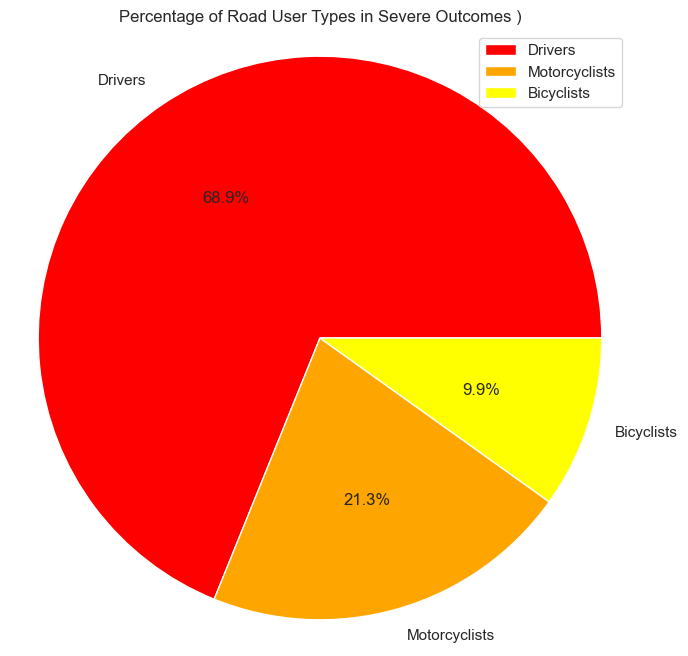

In [99]:
#Filter the data to include only the specified road_user_type_desc values
filtered_data = crash_data[crash_data['road_user_type_desc'].isin(['Drivers', 'Motorcyclists', 'Bicyclists'])]

#Group the filtered data by road_user_type_desc and calculate the count of severe outcomes
severe_outcome_counts = filtered_data[filtered_data['severe_outcome'] == 1]['road_user_type_desc'].value_counts()

#Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(severe_outcome_counts, labels=severe_outcome_counts.index, autopct='%.1f%%', colors=['red', 'orange', 'yellow'])
plt.title('Percentage of Road User Types in Severe Outcomes )')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.savefig('road_user_type_severe_outcome_pie_chart.png') # Save the plot as an image
plt.show()






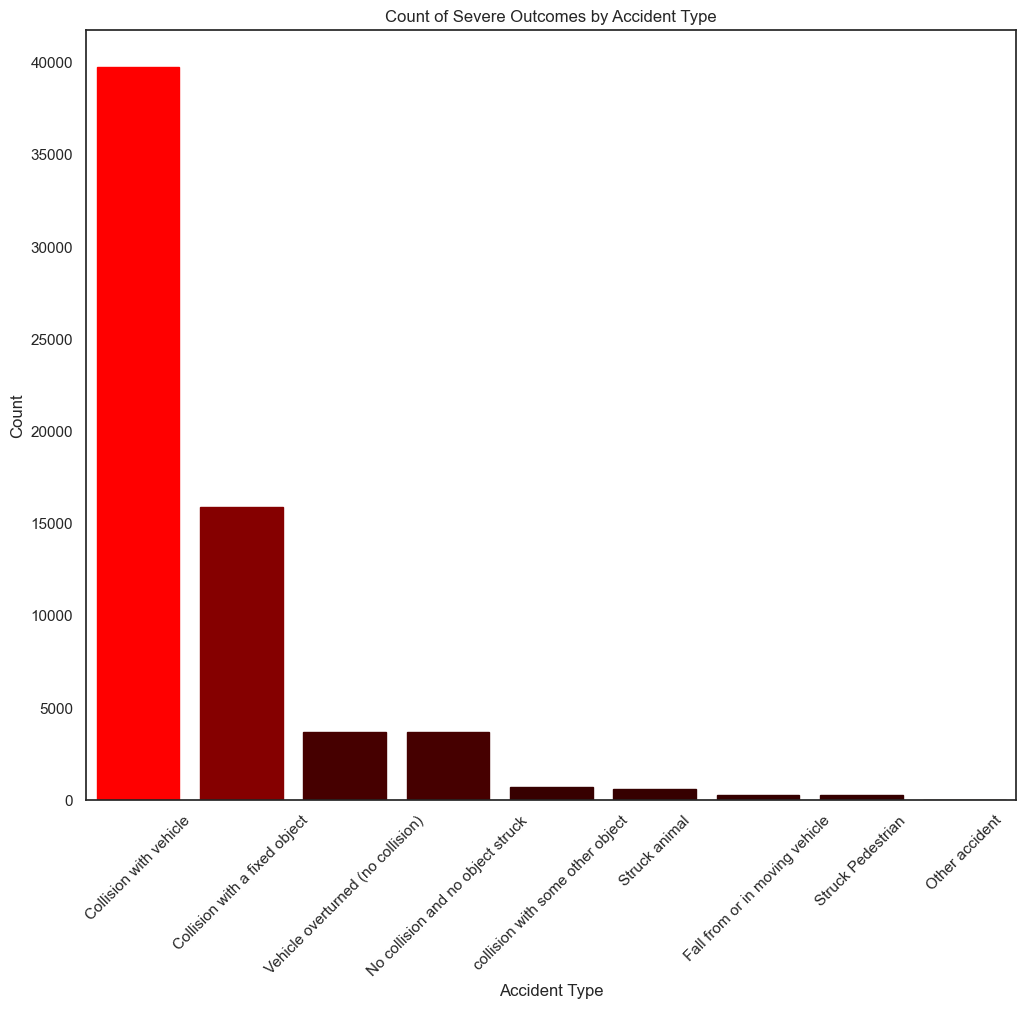

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

#Group the filtered data by accident_type_desc and calculate the count of severe outcomes
severe_outcome_counts = filtered_data[filtered_data['severe_outcome'] == 1]['accident_type_desc'].value_counts()

#Sort the values in descending order
severe_outcome_counts = severe_outcome_counts.sort_values(ascending=False)

#Define the colors for the bar plot
colors = sns.color_palette('Reds_r', len(severe_outcome_counts))

#Plot the bar plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=severe_outcome_counts.index, y=severe_outcome_counts.values, palette=colors)
plt.title('Count of Severe Outcomes by Accident Type')
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Customize the color intensity based on the count values
for i, bar in enumerate(ax.patches):
    intensity = 0.2 + 0.8 * (severe_outcome_counts.values[i] / severe_outcome_counts.max())
    bar.set_color((intensity, 0, 0))

plt.savefig('accident_type_severe_outcome_bar_plot.png') # Save the plot as an image
plt.show()

In [106]:
crash_data.columns

Index(['accident_no', 'vehicle_id', 'sex', 'age_group', 'inj_level_desc',
       'seating_position', 'helmet_belt_worn', 'road_user_type',
       'road_user_type_desc', 'accidentdate', 'accidenttime',
       'accident_type_desc', 'day_week_description', 'dca_description',
       'light_condition_desc', 'no_persons', 'no_persons_killed',
       'road_geometry', 'road_geometry_desc', 'severity', 'speed_zone',
       'surface_cond_desc', 'road_name', 'road_type', 'distance_location',
       'lga_name', 'region_name', 'deg_urban_name', 'lat', 'long',
       'postcode_no', 'atmosph_cond_desc', 'vehicle_year_manuf',
       'road_surface_type_desc_x', 'vehicle_type_desc_x', 'total_no_occupants',
       'traffic_control_desc_x', 'severity_level', 'year_of_vehicle',
       'road_surface_type_desc_y', 'reg_state', 'vehicle_body_style',
       'vehicle_make', 'vehicle_model', 'condensed_vehicle_type',
       'condensed_total_occupants', 'condensed_no_of_vehicles', 'inj_binary',
       'severe_out

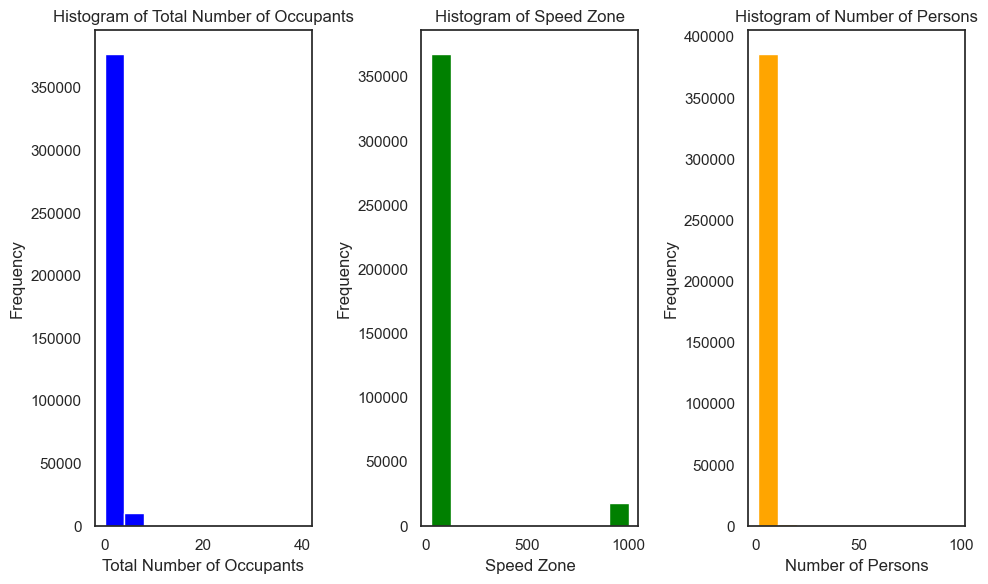

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Histogram of total_no_occupants
plt.subplot(1, 3, 1)
plt.hist(crash_data['total_no_occupants'], bins=10, color='blue')
plt.title('Histogram of Total Number of Occupants')
plt.xlabel('Total Number of Occupants')
plt.ylabel('Frequency')

# Histogram of speed_zone
plt.subplot(1, 3, 2)
plt.hist(crash_data['speed_zone'], bins=10, color='green')
plt.title('Histogram of Speed Zone')
plt.xlabel('Speed Zone')
plt.ylabel('Frequency')

# Histogram of no_persons
plt.subplot(1, 3, 3)
plt.hist(crash_data['no_persons'], bins=10, color='orange')
plt.title('Histogram of Number of Persons')
plt.xlabel('Number of Persons')
plt.ylabel('Frequency')

plt.tight_layout()

# Save the figure
plt.savefig('histograms.png')

# Display the figure
plt.show()

In [110]:
crash_data['severe_outcome'].value_counts()

0    322599
1     64953
Name: severe_outcome, dtype: int64